# **Proyecto Final de Data Science III - Augusto Parajón**


---




## *Análisis predictivo de ventas y riesgo de quiebre de stock en el canal e-commerce para soporte en la toma de decisiones gerenciales*

### **1. Problema de negocio**

Actualmente, los quiebres de stock dentro del canal e-commerce no se encuentran monitoreados ni gestionados de forma activa, lo que deriva en la pausa automática de la publicación en la plataforma de ventas. Esta situación genera pérdida de oportunidades comerciales, impacto negativo en los ingresos y deterioro de la experiencia del cliente con la marca, especialmente en productos de alta rotación y alto margen.


La planificación de abastecimiento se realiza de manera reactiva o con información incompleta, sin contar con una herramienta que permita anticipar, con un horizonte temporal adecuado, qué productos presentan riesgo de quiebre, particularmente en el stock gestionado bajo el modelo FULL de MercadoLibre.


El problema central radica en la falta de capacidad predictiva para anticipar quiebres de stock con la antelación necesaria, lo que limita la toma de decisiones oportunas por parte de las áreas de e-commerce, operaciones y compras.



### **2. Objetivo general del proyecto**

Desarrollar un modelo analítico que permita anticipar el riesgo de quiebre de stock en el canal e-commerce, con un horizonte de 21 días, a partir del análisis del comportamiento histórico de ventas y productos, con el fin de mejorar la planificación de abastecimiento y reducir la pérdida de ventas derivada de publicaciones pausadas.


### **3. Decisiones gerenciales que busca apoyar**

El proyecto busca apoyar principalmente la planificación del abastecimiento, priorizando la compra de productos con mayor riesgo de quiebre de stock, especialmente aquellos de alta venta y alto margen.

De manera complementaria, el modelo permitirá definir alertas y mecanismos de escalamiento que faciliten la comunicación anticipada entre las áreas involucradas, contribuyendo a una mejor coordinación entre la gerencia de e-commerce, la gerencia operativa y el área de compras.


### **4. Alcance del proyecto**

El análisis se realizará inicialmente a nivel SKU, permitiendo posteriormente la agregación de resultados a nivel rubro para facilitar la toma de decisiones gerenciales.

El proyecto se enfocará exclusivamente en el stock correspondiente al depósito FULL de MercadoLibre, en una primera etapa. El horizonte de anticipación del quiebre será de 21 días y se priorizarán productos críticos definidos por su nivel de ventas y margen.

El alcance geográfico será nacional, considerando el canal e-commerce a través de MercadoLibre. El período de análisis contemplará hasta 24 meses de datos históricos.


### **5. Enfoque metodológico: uso de Deep Learning y NLP**

El enfoque metodológico del proyecto se basa en la utilización de técnicas de **Deep Learning aplicadas al análisis predictivo de la demanda**, con el objetivo de estimar el comportamiento futuro de las ventas a nivel producto y utilizar dicha estimación como insumo para la toma de decisiones gerenciales vinculadas al abastecimiento.

El modelo predictivo no busca identificar quiebres de stock de manera directa ni clasificar eventos históricos de quiebre, dado que dicha información no se encuentra explícitamente disponible en los datos. En su lugar, el problema de negocio se transforma en un **problema de estimación de demanda futura**, con un horizonte de 21 días, a partir del comportamiento histórico de ventas.

Sobre la base de esta estimación, el proyecto define dos **usos diferenciados del modelo predictivo**, según el estado operativo del producto:

- **Productos con stock disponible**  
  En este caso, la demanda futura estimada se compara contra el stock actual para construir un **indicador de riesgo de quiebre**, que permite priorizar productos cuya demanda proyectada podría superar la disponibilidad en el horizonte de análisis. Este indicador constituye el principal output preventivo del modelo y está orientado a anticipar decisiones de reposición.

- **Productos sin stock disponible (quiebre consumado)**  
  Para aquellos productos que ya no cuentan con stock, el modelo predictivo se utiliza para **evaluar la continuidad de la demanda**, estimando si el producto mantiene un nivel de interés relevante en el horizonte futuro. Este análisis permite evitar decisiones de reposición basadas únicamente en ventas pasadas recientes y focalizar la atención en productos quebrados que continúan siendo relevantes desde el punto de vista comercial.

De este modo, el modelo de Deep Learning actúa como un **motor común de estimación de demanda**, mientras que la lógica de decisión se construye en capas posteriores, diferenciando claramente entre predicción y acción. El modelo estima comportamientos futuros; las decisiones de reposición y priorización se definen a partir de reglas de negocio alineadas con los objetivos gerenciales.

De manera complementaria, el proyecto incorpora técnicas de **Procesamiento de Lenguaje Natural (NLP)** aplicadas a nombres y descripciones de productos, con el objetivo de estructurar información textual no normalizada y generar variables semánticas que aporten contexto adicional al análisis. Este componente cumple un rol de soporte, permitiendo mejorar la representación de los productos y facilitar la generalización del modelo, sin sustituir el enfoque principal basado en el comportamiento histórico de ventas.

En conjunto, este enfoque metodológico permite abordar el problema de quiebre de stock desde una perspectiva predictiva, flexible y alineada con las limitaciones de los datos disponibles, manteniendo una clara separación entre el proceso de estimación y la toma de decisiones gerenciales.




### **6. Datos disponibles y contexto de información**

El proyecto cuenta con dos fuentes de datos principales, provenientes del ERP interno y correspondientes al canal e-commerce operado bajo el modelo FULL de MercadoLibre. Los datos son reales de operación, con modificaciones aplicadas únicamente por razones de confidencialidad.

La primera fuente corresponde a una tabla de ventas históricas con un período de 24 meses, donde cada registro representa la venta de un SKU individual. Esta información incluye tanto productos actualmente activos como productos inactivos, permitiendo analizar el comportamiento histórico de la demanda a nivel producto.

La segunda fuente corresponde a una tabla de stock actual, que refleja el inventario vigente de los SKUs activos en el canal FULL, sin contar con historial temporal de stock.

En una **primera fase de generación y validación del proyecto**, los datos serán importados a partir de **archivos CSV descargados desde el ERP**, con el objetivo de facilitar el desarrollo, la exploración y la verificación del modelo analítico. Una vez finalizado el proyecto y validados sus resultados, se prevé **la conexión directa a la base de datos del ERP mediante una vista SQL**, lo que permitirá trabajar con información actualizada y habilitar alertas operativas en tiempo casi real.

Las tablas se encuentran separadas y no se dispone de información adicional sobre lead times de reposición, quiebres históricos explícitos, demanda no satisfecha ni variables operativas de proveedores. Aun con estas limitaciones, los datos disponibles resultan adecuados para abordar el problema de negocio planteado, al permitir analizar la relación entre el comportamiento histórico de ventas y la situación actual de stock como base para la planificación del abastecimiento.




---



## **Unidad I - Preparación de datos**



---



### *Esta unidad tiene como objetivo transformar los datos crudos de ventas en un dataset consistente, limpio y modelable, alineado con la definición metodológica del proyecto. En esta etapa se construye la señal de demanda histórica a nivel producto–día, asegurando continuidad temporal, tratamiento correcto de anulaciones y una base sólida para el posterior modelado predictivo. No se realizan análisis exploratorios ni modelado; el foco está exclusivamente en calidad, estructura y coherencia de los datos.*

### **1 - Importación de librerias**

In [2]:
import pandas as pd
import numpy as np

from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import warnings

import gdown

warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Descarga de recursos necesarios (solo la primera vez)
nltk.download('stopwords')

# Inicialización de herramientas NLP
stopwords_es = set(stopwords.words('spanish'))
stemmer = SnowballStemmer('spanish')

from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

import numpy as np
import pandas as pd

### **2 - Importación de datos**

In [3]:
# IDs de Google Drive (archivos individuales)
id_ventas = '1F6RJhT62octBBwznVjibzjOcr0YcDymD'
id_stock  = '1V1lhq3blACRlXOwkt_ltdFGvd6mtt886'
id_clasif = '1hycI4ItYcg04i0N0ZXKLx46HPzjR2aE7'

# URLs de descarga directa
url_ventas = f'https://drive.google.com/uc?id={id_ventas}'
url_stock  = f'https://drive.google.com/uc?id={id_stock}'
url_clasif = f'https://drive.google.com/uc?id={id_clasif}'

# Descarga de archivos
gdown.download(url_ventas, 'Ventas Full - 24-25.csv', quiet=False)
gdown.download(url_stock,  'Stock full 0124.csv', quiet=False)
gdown.download(url_clasif, 'Clasificacion Productos.csv', quiet=False)

# Carga de datasets con encoding correcto
df_ventas_raw = pd.read_csv(
    'Ventas Full - 24-25.csv',
    encoding='latin1',
    sep=None,
    engine='python',
    on_bad_lines='skip'
)

df_stock_raw = pd.read_csv(
    'Stock full 0124.csv',
    encoding='latin1',
    sep=None,
    engine='python',
    on_bad_lines='skip'
)

df_clasif_raw = pd.read_csv(
    'Clasificacion Productos.csv',
    encoding='latin1',
    sep=None,
    engine='python',
    on_bad_lines='skip'
)

# Verificación básica
print("Ventas - shape:", df_ventas_raw.shape)
print("Stock  - shape:", df_stock_raw.shape)
print("Clasificación - shape:", df_clasif_raw.shape)

print("\nColumnas ventas:")
display(df_ventas_raw.columns)

print("\nColumnas stock:")
display(df_stock_raw.columns)

print("\nColumnas clasificación:")
display(df_clasif_raw.columns)




Downloading...
From: https://drive.google.com/uc?id=1F6RJhT62octBBwznVjibzjOcr0YcDymD
To: /content/Ventas Full - 24-25.csv
100%|██████████| 3.39M/3.39M [00:00<00:00, 43.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1V1lhq3blACRlXOwkt_ltdFGvd6mtt886
To: /content/Stock full 0124.csv
100%|██████████| 2.00k/2.00k [00:00<00:00, 4.86MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hycI4ItYcg04i0N0ZXKLx46HPzjR2aE7
To: /content/Clasificacion Productos.csv
100%|██████████| 15.1M/15.1M [00:00<00:00, 23.5MB/s]


Ventas - shape: (16575, 40)
Stock  - shape: (12, 15)
Clasificación - shape: (122498, 15)

Columnas ventas:


Index(['Fecha', 'Hora', 'Comprobante', 'Nº', 'Cliente', 'Dni/Cuit', 'Vendedor',
       'Sucursal', 'NC', 'Total', 'Tipo', '% s/Ctdo', 'Mkp Gral', 'Mkp Neto',
       'Tarjetas', 'Imp. Tarj.', 'Costo Prod.', 'Costo Tarj.', 'Recargo',
       'Mkp. Neto $', 'Telefono', 'Mail', 'Empresa', 'Código', 'Descripción',
       'Modelo', 'Marca', 'Dep.', 'Cant.', 'Anul.', 'P.Unitario', 'P.Total',
       '% s/Ctdo2', 'Contado', 'Mkp Gral.', 'Mkp Neto3', 'Costo Prod.4',
       'Costo Tarj.5', 'Recargo6', 'Mkp. Neto $7'],
      dtype='object')


Columnas stock:


Index(['Familia', 'Rubro', 'Subrub.', 'Marca', 'Codigo', 'GTIN', 'Descripción',
       'Modelo', 'Stock Disponible', 'C.Repo.', 'C.U.Com.', 'F.U.Com.',
       'Precio', 'Cod.', 'Proveedor'],
      dtype='object')


Columnas clasificación:


Index(['nroreg', 'ltmreg', 'idfami', 'idrubr', 'idsubr', 'idmarc', 'Familia',
       'Rubro', 'Subrub.', 'Marca', 'Codigo', 'GTIN', 'Descripción', 'Modelo',
       'Fisico'],
      dtype='object')

### **3 - Limpieza y normalización de DataSet**

In [4]:
# --- Selección de columnas relevantes - Ventas ---
cols_ventas = [
    'Fecha',
    'Código',
    'Descripción',
    'Modelo',
    'Marca',
    'Cant.',
    'Anul.',
    'NC'
]
df_ventas = df_ventas_raw[cols_ventas].copy()

# --- Selección de columnas relevantes - Stock ---
cols_stock = [
    'Codigo',
    'Descripción',
    'Modelo',
    'Marca',
    'Stock Disponible'
]
df_stock = df_stock_raw[cols_stock].copy()

# --- Selección de columnas relevantes - Clasificación de productos (ABM) ---
cols_clasif = [
    'Familia',
    'Rubro',
    'Subrub.',
    'Marca',
    'Codigo',
    'Descripción',
    'Modelo'
]
df_clasif = df_clasif_raw[cols_clasif].copy()

# --- Normalización de tipo de código en ABM (float -> entero nullable) ---
df_clasif['Codigo'] = (
    df_clasif['Codigo']
    .round()
    .astype('Int64')
)

# --- Depuración de ventas: anulaciones y notas de crédito ---
df_ventas_limpio = df_ventas[
    (df_ventas['Anul.'] == 0) &
    (df_ventas['NC'].isna())
].copy()

# --- Normalización del campo Fecha ---
df_ventas_limpio['Fecha'] = pd.to_datetime(
    df_ventas_limpio['Fecha'],
    errors='coerce',
    dayfirst=True
)
df_ventas_limpio = df_ventas_limpio.dropna(subset=['Fecha'])

# --- construcción de tabla lookup desde ABM ---
df_abm_lookup = (
    df_clasif[['Codigo', 'Rubro', 'Familia']]
    .drop_duplicates(subset=['Codigo'])
)

# --- agregar Rubro y Familia a ventas ---
df_ventas_limpio = df_ventas_limpio.merge(
    df_abm_lookup,
    left_on='Código',
    right_on='Codigo',
    how='left'
)

# --- Limpieza post-merge ---
df_ventas_limpio = df_ventas_limpio.drop(columns=['Codigo'])

# --- Controles finales ---
print(
    f"Ventas originales: {df_ventas.shape} | "
    f"Ventas limpias: {df_ventas_limpio.shape} | "
    f"Stock: {df_stock.shape} | "
    f"Clasificación: {df_clasif.shape} | "
    f"Rango fechas: {df_ventas_limpio['Fecha'].min().date()} → {df_ventas_limpio['Fecha'].max().date()}"
)

total_registros = len(df_ventas_limpio)
sin_rubro = df_ventas_limpio['Rubro'].isna().sum()
sin_familia = df_ventas_limpio['Familia'].isna().sum()

print("Registros totales ventas:", total_registros)
print("Ventas sin Rubro:", sin_rubro)
print("Ventas sin Familia:", sin_familia)
print(f"% sin Rubro: {sin_rubro / total_registros:.2%}")
print(f"% sin Familia: {sin_familia / total_registros:.2%}")


# Impresión de las tres tablas resultantes

print("\n=== TABLA VENTAS LIMPIAS (con Rubro y Familia) ===")
display(df_ventas_limpio.head(10))

print("\n=== TABLA STOCK ===")
display(df_stock.head(10))

print("\n=== TABLA CLASIFICACIÓN (ABM) ===")
display(df_clasif.head(10))




Ventas originales: (16575, 8) | Ventas limpias: (15887, 10) | Stock: (12, 5) | Clasificación: (122498, 7) | Rango fechas: 2024-01-02 → 2026-01-24
Registros totales ventas: 15887
Ventas sin Rubro: 0
Ventas sin Familia: 0
% sin Rubro: 0.00%
% sin Familia: 0.00%

=== TABLA VENTAS LIMPIAS (con Rubro y Familia) ===


,Fecha,Código,Descripción,Modelo,Marca,Cant.,Anul.,NC,Rubro,Familia
0,2024-08-22,77092,CALEFACTOR LILIANA INFRARROJO CI070 500/1000W,CI070,LILIANA,1,0,NaN,ESTUFA,CLIMATIZACION
1,2024-11-27,97403,CAFETERA NESPRESSO C30 ESSENZA MINI WHITE 0.19...,C30-AR-WH-NE2,NESPRESSO,1,0,NaN,CAFETERA,PEQUEÑOS ELECTRODOMESTICOS
2,2024-08-28,33284,ASPIRADORA ULTRACOMB AS-4220 1400W S/BOLSA 1.2L,NaN,ULTRACOMB,1,0,NaN,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
3,2024-08-13,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,1,0,NaN,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
4,2024-08-26,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,1,0,NaN,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
5,2024-09-02,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,1,0,NaN,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
6,2024-08-26,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,1,0,NaN,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
7,2024-08-23,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,1,0,NaN,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
8,2024-08-23,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,1,0,NaN,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
9,2024-08-28,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,1,0,NaN,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS



=== TABLA STOCK ===


,Codigo,Descripción,Modelo,Marca,Stock Disponible
0,113392,GAZEBO OUTDOORS PROF 7030 RAFIA JARD.EASYCAMP BCO,7030,OUTDOORS PROFES,25
1,120700,"CELULAR NUBIA MUSIC 2 MELODY OCTA/4GB/128GB/6.7""",MUSIC 2 MELOD,NUBIA,20
2,118324,ESPUMADOR DE LECHE PEABODY PE-MF2316 250ML,PE-MF2316,PEABODY,20
3,92962,SANDWICHERA PEABODY PE-S6191 P/4 SANDWICHES,PE-S6191,PEABODY,27
4,120701,"CELULAR NUBIA FOCUS 2 5G OCTA/8GB/256GB/6.7""/A15",NUBIA FOC 2,NUBIA,20
5,120699,Celular Nubia Music 2 Pop Art 128gb 4gb Ram Co...,Music 2 Pop Art,NUBIA,30
6,89240,CAFETERA NESPRESSO D30 ESSENZA MINI BLACK 0.19...,ESSENZA MINI,NESPRESSO,20
7,98197,COLCHON CANNON COMPAC ESPUMA 080X190X25,COMPAC,CANNON,12
8,122545,Nubia Neo 3 5g 256 Gb 8 Gb Ram Plateado,Neo 3,NUBIA,30
9,121319,COLCHON INFLABLE USB WAGGS COLI04 1PZA GRIS,COLI04,WAGGS,12



=== TABLA CLASIFICACIÓN (ABM) ===


,Familia,Rubro,Subrub.,Marca,Codigo,Descripción,Modelo
0,BLANCO,SABANAS,SABANAS,PALETTE,1,SABANA PALETTE JGO 18189 2 1/2 PL.180H ACCENT ...,NaN
1,MUEBLES,ACC.BAÑO,ACC.BAÑO,OSCAR BARBIERI,2,RECUPERO PUBLIC.MAILING 2¦SEMESTRE 2014,NaN
2,T.V. / DVD,LCD,LCD,PHILIPS,3,"CAMBIO LCD 42""PHILIPS PFL 3007",NaN
3,T.V. / DVD,ANTENA PANEL,ANTENA PANEL,OBSA,4,ANTENA PANEL 14 DB.ACCESPOINT/MICRONET C/INSTA...,NaN
4,T.V. / DVD,ANTENA PANEL,ANTENA PANEL,OBSA,5,ANTENA PANEL 14 DB.DE 21 O 24 ELEM C/INSTALACION,NaN
5,T.V. / DVD,ANTENA PANEL,ANTENA PANEL,OBSA,6,ANTENA PANEL EDIMAX C/ESTANCA Y ABRASADERA TAFI,NaN
6,T.V. / DVD,ANTENA PANEL,ANTENA PANEL,OBSA,7,ANTENA NANOLOCO STATION 2 P/INST.INTERNET,NaN
7,T.V. / DVD,ANTENA PANEL,ANTENA PANEL,OBSA,8,ANTENA LARGA DISTANCIA COMPLETA,NaN
8,T.V. / DVD,ANTENA PANEL,ANTENA PANEL,OBSA,9,ANTENA WIFI USB,NaN
9,BAZAR,PLATO,PLATO,NADIR,10,JGO. PLATOS NADIR MENU TULIPA 16PZAS DECOR. 18...,182902


### **4 - Normalización de claves**

In [5]:
### **4 - Normalización de claves**

# 1) Crear la clave canónica 'sku_id' a partir del código de producto
df_ventas_limpio['sku_id'] = (
    df_ventas_limpio['Código']
    .astype(str)
    .str.strip()
)

df_stock['sku_id'] = (
    df_stock['Codigo']
    .astype(str)
    .str.strip()
)

df_clasif['sku_id'] = (
    df_clasif['Codigo']
    .astype(str)
    .str.strip()
)

# 2) Controles básicos de unicidad (no se eliminan registros)
ventas_sku_unicos = df_ventas_limpio['sku_id'].nunique()
stock_sku_unicos  = df_stock['sku_id'].nunique()
clasif_sku_unicos = df_clasif['sku_id'].nunique()

print(
    f"SKUs únicos | "
    f"Ventas: {ventas_sku_unicos} | "
    f"Stock: {stock_sku_unicos} | "
    f"Clasificación: {clasif_sku_unicos}"
)

# 3) Validaciones de cobertura entre tablas (solo métricas)
skus_ventas = set(df_ventas_limpio['sku_id'].unique())
skus_stock  = set(df_stock['sku_id'].unique())
skus_clasif = set(df_clasif['sku_id'].unique())

cob_ventas_clasif = len(skus_ventas & skus_clasif) / len(skus_ventas) if skus_ventas else 0
cob_stock_clasif  = len(skus_stock & skus_clasif)  / len(skus_stock)  if skus_stock  else 0

print(
    f"Cobertura clasificación | "
    f"Ventas→Clasif: {cob_ventas_clasif:.2%} | "
    f"Stock→Clasif: {cob_stock_clasif:.2%}"
)

# 4) Vista rápida de la nueva clave + dimensiones incorporadas
print("\n--- Vista ventas (sku_id + Rubro/Familia) ---")
display(
    df_ventas_limpio[
        ['sku_id', 'Descripción', 'Modelo', 'Marca', 'Rubro', 'Familia']
    ].head()
)

print("\n--- Vista stock (sku_id) ---")
display(
    df_stock[
        ['sku_id', 'Descripción', 'Modelo', 'Marca']
    ].head()
)

print("\n--- Vista clasificación (sku_id) ---")
display(
    df_clasif[
        ['sku_id', 'Familia', 'Rubro', 'Subrub.', 'Marca']
    ].head()
)



SKUs únicos | Ventas: 170 | Stock: 12 | Clasificación: 122498
Cobertura clasificación | Ventas→Clasif: 100.00% | Stock→Clasif: 100.00%

--- Vista ventas (sku_id + Rubro/Familia) ---


,sku_id,Descripción,Modelo,Marca,Rubro,Familia
0,77092,CALEFACTOR LILIANA INFRARROJO CI070 500/1000W,CI070,LILIANA,ESTUFA,CLIMATIZACION
1,97403,CAFETERA NESPRESSO C30 ESSENZA MINI WHITE 0.19...,C30-AR-WH-NE2,NESPRESSO,CAFETERA,PEQUEÑOS ELECTRODOMESTICOS
2,33284,ASPIRADORA ULTRACOMB AS-4220 1400W S/BOLSA 1.2L,NaN,ULTRACOMB,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
3,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
4,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS



--- Vista stock (sku_id) ---


,sku_id,Descripción,Modelo,Marca
0,113392,GAZEBO OUTDOORS PROF 7030 RAFIA JARD.EASYCAMP BCO,7030,OUTDOORS PROFES
1,120700,"CELULAR NUBIA MUSIC 2 MELODY OCTA/4GB/128GB/6.7""",MUSIC 2 MELOD,NUBIA
2,118324,ESPUMADOR DE LECHE PEABODY PE-MF2316 250ML,PE-MF2316,PEABODY
3,92962,SANDWICHERA PEABODY PE-S6191 P/4 SANDWICHES,PE-S6191,PEABODY
4,120701,"CELULAR NUBIA FOCUS 2 5G OCTA/8GB/256GB/6.7""/A15",NUBIA FOC 2,NUBIA



--- Vista clasificación (sku_id) ---


,sku_id,Familia,Rubro,Subrub.,Marca
0,1,BLANCO,SABANAS,SABANAS,PALETTE
1,2,MUEBLES,ACC.BAÑO,ACC.BAÑO,OSCAR BARBIERI
2,3,T.V. / DVD,LCD,LCD,PHILIPS
3,4,T.V. / DVD,ANTENA PANEL,ANTENA PANEL,OBSA
4,5,T.V. / DVD,ANTENA PANEL,ANTENA PANEL,OBSA


### **5 - Señal de demanda - SKU por día**

In [6]:
# 1) Normalización del tipo de cantidad vendida
df_ventas_limpio['Cant.'] = pd.to_numeric(
    df_ventas_limpio['Cant.'],
    errors='coerce'
).fillna(0)

# 2) Agregación de ventas a nivel SKU–día
df_demanda_sku_dia = (
    df_ventas_limpio
    .groupby(
        ['sku_id', 'Fecha', 'Rubro', 'Familia'],
        as_index=False
    )
    .agg(demanda_diaria=('Cant.', 'sum'))
)

# 3) Construcción de la grilla completa SKU × Fecha
rango_fechas = pd.date_range(
    start=df_demanda_sku_dia['Fecha'].min(),
    end=df_demanda_sku_dia['Fecha'].max(),
    freq='D'
)

skus = df_demanda_sku_dia[['sku_id', 'Rubro', 'Familia']].drop_duplicates()

grilla_completa = (
    skus
    .assign(key=1)
    .merge(
        pd.DataFrame({'Fecha': rango_fechas, 'key': 1}),
        on='key'
    )
    .drop(columns='key')
)

# 4) Unión con la demanda observada
df_panel_sku_dia = grilla_completa.merge(
    df_demanda_sku_dia,
    on=['sku_id', 'Fecha', 'Rubro', 'Familia'],
    how='left'
)

# 5) Imputación inicial de ceros
df_panel_sku_dia['demanda_diaria'] = df_panel_sku_dia['demanda_diaria'].fillna(0)

target_zero_ratio = 0.09
panel_final = []

for sku, df_sku in df_panel_sku_dia.groupby('sku_id'):
    df_ceros = df_sku[df_sku['demanda_diaria'] == 0]
    df_no_ceros = df_sku[df_sku['demanda_diaria'] > 0]

    if len(df_no_ceros) == 0:
        continue

    ceros_max = int(
        (len(df_no_ceros) * target_zero_ratio) / (1 - target_zero_ratio)
    )

    df_ceros_reducidos = df_ceros.sample(
        n=min(ceros_max, len(df_ceros)),
        random_state=42
    )

    panel_final.append(
        pd.concat([df_no_ceros, df_ceros_reducidos])
    )

df_panel_sku_dia_final = (
    pd.concat(panel_final)
    .sort_values(['sku_id', 'Fecha'])
    .reset_index(drop=True)
)


historia_sku = (
    df_panel_sku_dia_final
    .groupby('sku_id')
    .agg(
        dias_con_venta=('demanda_diaria', lambda x: (x > 0).sum()),
        dias_totales=('demanda_diaria', 'size')
    )
    .reset_index()
)

umbral_dias_venta = 10

skus_validos = historia_sku[
    historia_sku['dias_con_venta'] >= umbral_dias_venta
]['sku_id']

df_panel_sku_dia_modelo = (
    df_panel_sku_dia_final
    [df_panel_sku_dia_final['sku_id'].isin(skus_validos)]
    .sort_values(['sku_id', 'Fecha'])
    .reset_index(drop=True)
)

fecha_min = df_panel_sku_dia_modelo['Fecha'].min()
fecha_max = df_panel_sku_dia_modelo['Fecha'].max()

print("Rango temporal panel:")
print(fecha_min.date(), "→", fecha_max.date())

porc_ceros_global = (
    (df_panel_sku_dia_modelo['demanda_diaria'] == 0).mean() * 100
)
print(f"% global de días con demanda = 0: {porc_ceros_global:.2f}%")

control_ceros_sku = (
    df_panel_sku_dia_modelo
    .groupby('sku_id')['demanda_diaria']
    .apply(lambda x: (x == 0).mean() * 100)
)

print("Máx % ceros por SKU:", control_ceros_sku.max())

historia_final = (
    df_panel_sku_dia_modelo
    .groupby('sku_id')
    .agg(dias_con_venta=('demanda_diaria', lambda x: (x > 0).sum()))
    .reset_index()
)

skus_historia_insuf = historia_final[
    historia_final['dias_con_venta'] < umbral_dias_venta
]

print("SKUs totales:", historia_final.shape[0])
print(
    "SKUs con historia insuficiente (<",
    umbral_dias_venta,
    "días con venta):",
    skus_historia_insuf.shape[0]
)

display(df_panel_sku_dia_modelo.head())
display(skus_historia_insuf.head())




Rango temporal panel:
2024-01-02 → 2026-01-22
% global de días con demanda = 0: 7.63%
Máx % ceros por SKU: 9.0
SKUs totales: 118
SKUs con historia insuficiente (< 10 días con venta): 0


,sku_id,Rubro,Familia,Fecha,demanda_diaria
0,100187,CALOVENTOR,CLIMATIZACION,2024-05-01,0.0
1,100187,CALOVENTOR,CLIMATIZACION,2025-05-12,1.0
2,100187,CALOVENTOR,CLIMATIZACION,2025-05-13,7.0
3,100187,CALOVENTOR,CLIMATIZACION,2025-05-14,8.0
4,100187,CALOVENTOR,CLIMATIZACION,2025-05-15,2.0


,sku_id,dias_con_venta


## **Unidad II – Análisis Exploratorio de Datos (EDA)**



---

### *Esta unidad tiene como objetivo analizar y caracterizar la señal de demanda construida en la Unidad I, con foco en comprender su comportamiento temporal, nivel de intermitencia y patrones de agregación.*
### *El EDA se realiza de forma dirigida y acotada, orientado a validar supuestos del modelo predictivo y justificar las decisiones metodológicas posteriores, particularmente la comparación entre enfoques a nivel SKU y Rubro.*
### *No se busca descubrir insights comerciales nuevos, sino entender la estructura del dato, sus limitaciones y su impacto en el modelado de demanda.*

### **1 – Análisis temporal global de la demanda**

#### *Esta fase analiza la evolución temporal de la demanda agregada, considerando todos los SKUs en conjunto. El objetivo es identificar tendencias generales, estacionalidad y variabilidad de la demanda en el período completo, sin entrar aún en desagregaciones por producto o rubro.*
#### *El análisis permite validar la coherencia temporal del panel, detectar comportamientos cíclicos y establecer un marco de referencia para los análisis posteriores a nivel SKU y Rubro.*

Shape demanda total diaria: (603, 2)
Rango fechas: 2024-01-02 → 2026-01-22


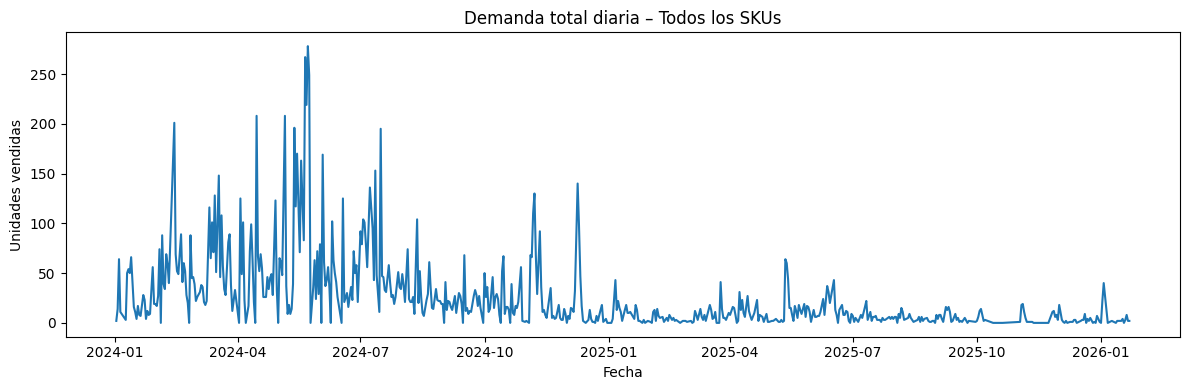

,Fecha,demanda_total
0,2024-01-02,2.0
1,2024-01-03,14.0
2,2024-01-04,64.0
3,2024-01-05,11.0
4,2024-01-09,3.0


In [7]:
# Agregación de demanda total diaria (todos los SKUs válidos)
df_demanda_total_dia = (
    df_panel_sku_dia_modelo
    .groupby('Fecha', as_index=False)
    .agg(demanda_total=('demanda_diaria', 'sum'))
)

# Controles básicos
print("Shape demanda total diaria:", df_demanda_total_dia.shape)
print(
    "Rango fechas:",
    df_demanda_total_dia['Fecha'].min().date(),
    "→",
    df_demanda_total_dia['Fecha'].max().date()
)

# Visualización de la serie temporal global
plt.figure(figsize=(12, 4))
plt.plot(
    df_demanda_total_dia['Fecha'],
    df_demanda_total_dia['demanda_total']
)
plt.title('Demanda total diaria – Todos los SKUs')
plt.xlabel('Fecha')
plt.ylabel('Unidades vendidas')
plt.tight_layout()
plt.show()

# Vista de control
display(df_demanda_total_dia.head())



##### **Conclusión – Análisis temporal global de la demanda**

El análisis de la demanda total diaria, construido a partir del panel final de SKUs con historia suficiente, evidencia una alta variabilidad temporal y una marcada irregularidad en los niveles de venta a lo largo del período observado. La serie presenta picos de demanda concentrados en momentos específicos y extensos tramos de baja actividad relativa, lo que refleja un comportamiento no estacionario, con mayor intensidad de ventas en los primeros meses del horizonte analizado y una reducción progresiva del nivel promedio hacia el final, interrumpida por eventos puntuales de alta demanda.

Si bien el preprocesamiento permitió reducir la sparsity extrema y asegurar una base mínima de información por producto, los resultados muestran que incluso a nivel agregado la demanda no exhibe continuidad temporal estable ni patrones regulares persistentes. Este análisis establece un marco de referencia clave para interpretar las desagregaciones posteriores y contextualiza las limitaciones estructurales que emergen al modelar la demanda en niveles más finos, como SKU o Rubro, donde la intermitencia y la variabilidad tienden a intensificarse.

### **2 – Análisis de la demanda a nivel SKU** **texto en negrita**

#### *Esta fase analiza el comportamiento de la demanda a nivel producto individual (SKU), con el objetivo de evaluar su frecuencia de venta, grado de intermitencia y variabilidad temporal.*
#### *El análisis permite dimensionar la sparsity extrema de la señal, identificar productos con historia insuficiente y entender las limitaciones que este nivel de granularidad impone al modelado predictivo, especialmente en enfoques de Deep Learning.*

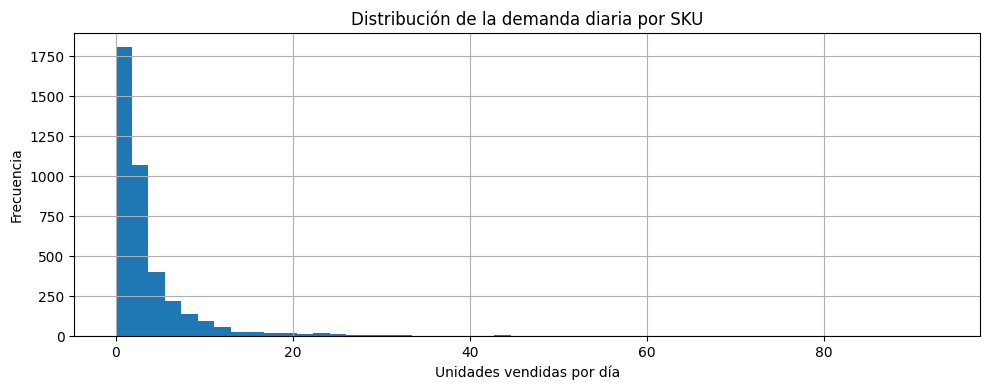

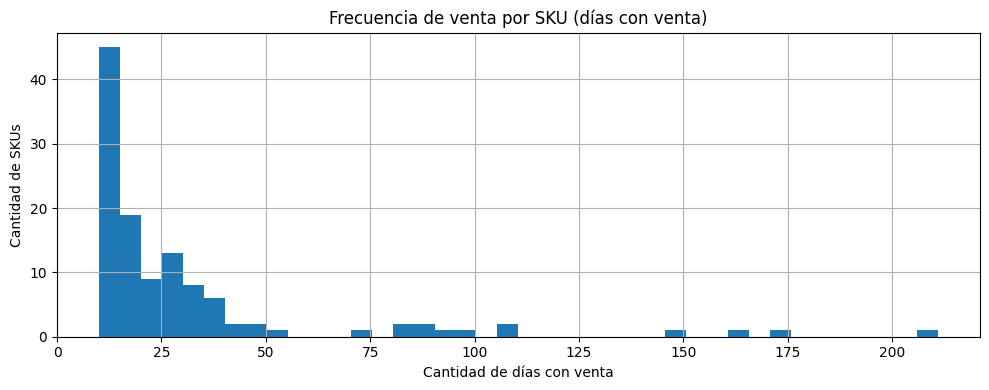

SKUs con menor cantidad de días con venta:


,sku_id,dias_con_venta,dias_totales
6,101355,10,10
23,106631,10,10
49,112449,10,10
55,112843,10,10
54,112826,10,10
62,114064,10,10
51,112794,10,10
39,112149,10,10
50,112471,10,10
65,114685,10,10


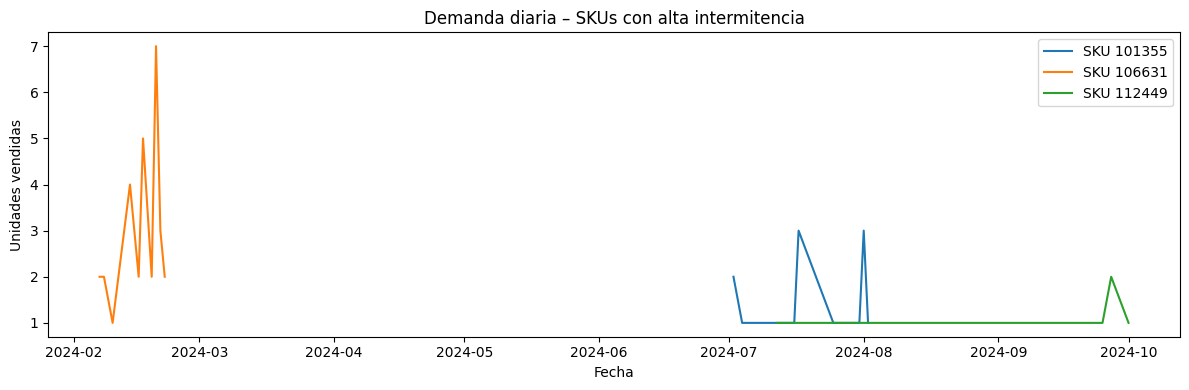

In [8]:
# 1) Distribución de la demanda diaria por SKU
plt.figure(figsize=(10, 4))
df_panel_sku_dia_modelo['demanda_diaria'].hist(bins=50)
plt.title('Distribución de la demanda diaria por SKU')
plt.xlabel('Unidades vendidas por día')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# 2) Frecuencia de venta por SKU (días con demanda > 0)
frecuencia_venta_sku = (
    df_panel_sku_dia_modelo
    .groupby('sku_id')
    .agg(
        dias_con_venta=('demanda_diaria', lambda x: (x > 0).sum()),
        dias_totales=('demanda_diaria', 'size')
    )
    .reset_index()
)

plt.figure(figsize=(10, 4))
frecuencia_venta_sku['dias_con_venta'].hist(bins=40)
plt.title('Frecuencia de venta por SKU (días con venta)')
plt.xlabel('Cantidad de días con venta')
plt.ylabel('Cantidad de SKUs')
plt.tight_layout()
plt.show()

# 3) Identificación de SKUs con mayor intermitencia
skus_mas_intermitentes = frecuencia_venta_sku.sort_values(
    'dias_con_venta',
    ascending=True
)

print("SKUs con menor cantidad de días con venta:")
display(skus_mas_intermitentes.head(10))

# 4) Series temporales de SKUs representativos (alta intermitencia)
skus_ejemplo = skus_mas_intermitentes['sku_id'].head(3).tolist()

plt.figure(figsize=(12, 4))
for sku in skus_ejemplo:
    serie = df_panel_sku_dia_modelo[df_panel_sku_dia_modelo['sku_id'] == sku]
    plt.plot(
        serie['Fecha'],
        serie['demanda_diaria'],
        label=f'SKU {sku}'
    )

plt.title('Demanda diaria – SKUs con alta intermitencia')
plt.xlabel('Fecha')
plt.ylabel('Unidades vendidas')
plt.legend()
plt.tight_layout()
plt.show()



##### **CONCLUSIÓN -  Análisis de la demanda a nivel SKU**

El análisis a nivel SKU evidencia una demanda fuertemente intermitente y altamente dispersa, caracterizada por una baja frecuencia de venta para la mayoría de los productos y una distribución muy asimétrica de la actividad comercial. Aun tras el acondicionamiento del dataset, se observa que muchos SKUs concentran su demanda en ventanas temporales acotadas, con picos aislados y escasa continuidad en el tiempo, lo que limita la estabilidad estadística de la señal individual.

Este patrón explica el comportamiento observado en los intentos de modelado predictivo a nivel SKU, donde los modelos tienden a subestimar la demanda futura o a converger hacia valores bajos, reflejando la falta de información temporal suficiente para capturar dinámicas consistentes. En consecuencia, los resultados obtenidos justifican metodológicamente que el nivel SKU no sea el más adecuado como base principal para modelos de Deep Learning orientados al forecast, y refuerzan la conveniencia de evaluar niveles de agregación superiores, como Rubro o Familia, donde la señal resulta más continua, informativa y potencialmente generalizable.

### **3 – Análisis agregado de la demanda a nivel Rubro**

#### *Esta fase analiza la demanda agregada por Rubro, con el objetivo de evaluar si este nivel de agregación reduce la intermitencia observada a nivel SKU y genera una señal más continua, estable y modelable.*
#### *El análisis permite comparar explícitamente la estructura temporal de la demanda por Rubro frente al comportamiento individual de los productos, aportando evidencia técnica para definir el nivel de agregación más adecuado para el modelo de Deep Learning.*

Shape demanda Rubro–día: (2620, 3)
Rango fechas: 2024-01-02 → 2026-01-24

% de días con demanda = 0 por Rubro:


,Rubro,porc_dias_cero
5,BATIDORA,0.000000
13,COLCHON INFLABLE,0.000000
10,CHIFONIER,0.000000
8,CARPA,0.000000
25,NOTEBOOK,0.000000
18,FREIDORA,0.000000
34,TURBO,0.000000
32,TABLETS,0.000000
35,VENT.TECHO,0.000000
15,ESCRITORIO,3.225806


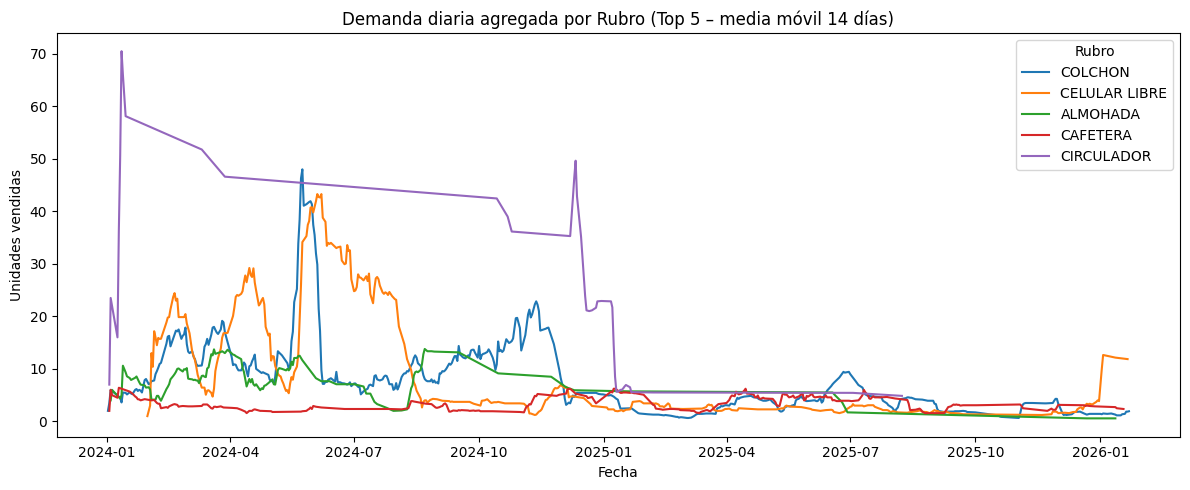

,Fecha,Rubro,demanda_rubro
0,2024-01-02,COLCHON,2.0
1,2024-01-02,VENT.TECHO,12.0
2,2024-01-03,CAFETERA,2.0
3,2024-01-03,CIRCULADOR,7.0
4,2024-01-03,COLCHON,5.0


In [9]:
# 1) Agregación de demanda diaria a nivel Rubro
df_demanda_rubro_dia = (
    df_panel_sku_dia_final
    .groupby(['Fecha', 'Rubro'], as_index=False)
    .agg(demanda_rubro=('demanda_diaria', 'sum'))
)

# 2) Controles básicos
print("Shape demanda Rubro–día:", df_demanda_rubro_dia.shape)
print(
    "Rango fechas:",
    df_demanda_rubro_dia['Fecha'].min().date(),
    "→",
    df_demanda_rubro_dia['Fecha'].max().date()
)

# 3) % de días con demanda = 0 por Rubro (métrica de intermitencia)
porc_ceros_rubro = (
    df_demanda_rubro_dia
    .groupby('Rubro')['demanda_rubro']
    .apply(lambda x: (x == 0).mean() * 100)
    .reset_index(name='porc_dias_cero')
    .sort_values('porc_dias_cero')
)

print("\n% de días con demanda = 0 por Rubro:")
display(porc_ceros_rubro)

# 4) Selección de Top 5 Rubros por volumen total vendido
top_rubros = (
    df_demanda_rubro_dia
    .groupby('Rubro')['demanda_rubro']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

df_top_rubros = df_demanda_rubro_dia[
    df_demanda_rubro_dia['Rubro'].isin(top_rubros)
].copy()

# 5) Suavizado temporal (media móvil 14 días)
df_top_rubros = df_top_rubros.sort_values('Fecha')
df_top_rubros['demanda_suavizada'] = (
    df_top_rubros
    .groupby('Rubro')['demanda_rubro']
    .transform(lambda x: x.rolling(window=14, min_periods=1).mean())
)

# 6) Visualización final (señal clara y comparable)
plt.figure(figsize=(12, 5))

for rubro in top_rubros:
    serie = df_top_rubros[df_top_rubros['Rubro'] == rubro]
    plt.plot(
        serie['Fecha'],
        serie['demanda_suavizada'],
        label=rubro
    )

plt.title('Demanda diaria agregada por Rubro (Top 5 – media móvil 14 días)')
plt.xlabel('Fecha')
plt.ylabel('Unidades vendidas')
plt.legend(title='Rubro')
plt.tight_layout()
plt.show()

# 7) Vista de control
display(df_demanda_rubro_dia.head())



##### **Conclusión – 3: Análisis agregado a nivel Rubro**

El análisis de la demanda agregada a nivel Rubro muestra una reducción clara de la intermitencia extrema observada a nivel SKU y una mejora sustancial en la continuidad temporal de la señal. Si bien persisten períodos con baja actividad, las series por Rubro presentan patrones más estables, con tramos de demanda sostenida, picos más consistentes y transiciones temporales interpretables.

En particular, los rubros de mayor volumen exhiben dinámicas diferenciadas a lo largo del tiempo, con cambios de régimen visibles y comportamientos que pueden asociarse a estacionalidad, ciclos comerciales o variaciones en la oferta. La aplicación de suavizado temporal permite resaltar estas dinámicas y confirmar que, a este nivel de agregación, la demanda contiene información estructural aprovechable para el modelado predictivo.

Estos resultados indican que el nivel Rubro logra concentrar la señal de demanda y mitigar el ruido generado por la rotación y discontinuidad de los SKUs individuales. En consecuencia, el Rubro se consolida como un nivel de agregación adecuado y defendible para el desarrollo de modelos de Deep Learning orientados al forecast, mientras que el nivel SKU queda mejor posicionado como referencia analítica o escenario comparativo.

### **4 – Análisis agregado de la demanda a nivel Familia**

#### Esta fase analiza la demanda agregada a nivel Familia, con el objetivo de evaluar si este nivel de agregación permite reducir significativamente la intermitencia observada a nivel SKU y Rubro, y generar una señal más continua, estable y apta para modelado predictivo.
#### La Familia se evalúa como posible nivel principal de modelado, dado que concentra mayor masa de demanda, amortigua la rotación de SKUs y se alinea mejor con decisiones reales de planificación y abastecimiento. Esta fase cumple un rol confirmatorio y cierra el EDA comparativo antes del Deep Learning.

Shape demanda Familia–día: (1884, 3)
Rango fechas: 2024-01-02 → 2026-01-24

% de días con demanda = 0 por Familia:


,Familia,porc_dias_cero
1,CAMPING Y JARDIN,0.000000
7,MUEBLES DE OFICINA,3.225806
5,INFORMATICA,5.263158
4,HOGAR,5.434783
8,PEQUEÑOS ELECTRODOMESTICOS,6.444444
0,AUDIO,6.896552
6,MUEBLES,6.976744
9,T.V. / DVD,7.812500
10,TELEFONIA,8.055556
2,CLIMATIZACION,8.588957


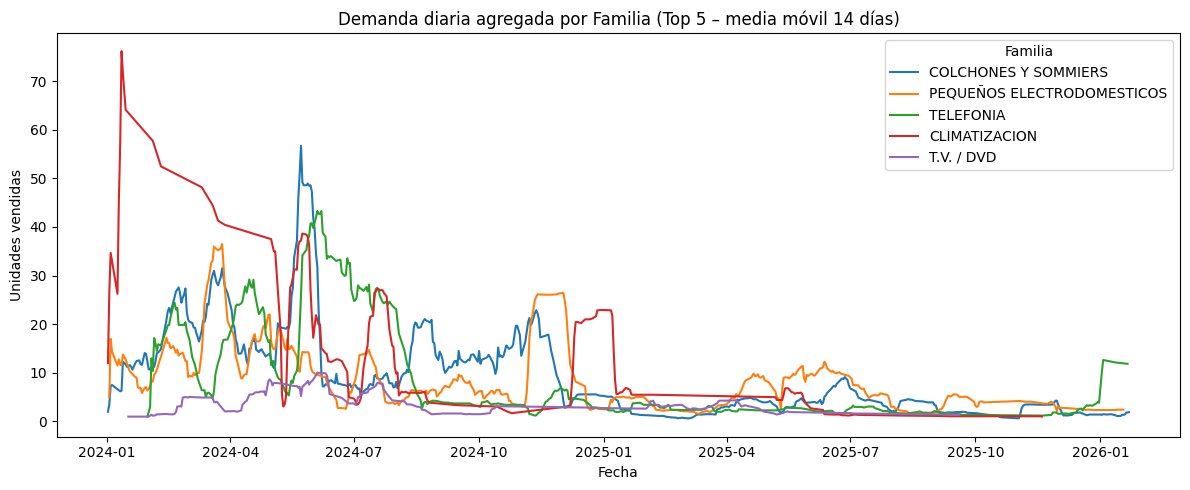

,Fecha,Familia,demanda_familia
0,2024-01-02,CLIMATIZACION,12.0
1,2024-01-02,COLCHONES Y SOMMIERS,2.0
2,2024-01-03,CLIMATIZACION,41.0
3,2024-01-03,COLCHONES Y SOMMIERS,5.0
4,2024-01-03,PEQUEÑOS ELECTRODOMESTICOS,5.0


In [10]:
# ============================================================
# EDA – Análisis agregado de la demanda a nivel Familia
# Dataset consistente con el panel final de modelado
# ============================================================

# 1) Agregación de demanda diaria a nivel Familia
df_demanda_familia_dia = (
    df_panel_sku_dia_final
    .groupby(['Fecha', 'Familia'], as_index=False)
    .agg(demanda_familia=('demanda_diaria', 'sum'))
)

# 2) Controles básicos
print("Shape demanda Familia–día:", df_demanda_familia_dia.shape)
print(
    "Rango fechas:",
    df_demanda_familia_dia['Fecha'].min().date(),
    "→",
    df_demanda_familia_dia['Fecha'].max().date()
)

# 3) % de días con demanda = 0 por Familia (métrica de estabilidad)
porc_ceros_familia = (
    df_demanda_familia_dia
    .groupby('Familia')['demanda_familia']
    .apply(lambda x: (x == 0).mean() * 100)
    .reset_index(name='porc_dias_cero')
    .sort_values('porc_dias_cero')
)

print("\n% de días con demanda = 0 por Familia:")
display(porc_ceros_familia)

# 4) Selección de Top 5 Familias por volumen total vendido
top_familias = (
    df_demanda_familia_dia
    .groupby('Familia')['demanda_familia']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

df_top_familias = df_demanda_familia_dia[
    df_demanda_familia_dia['Familia'].isin(top_familias)
].copy()

# 5) Suavizado temporal (media móvil 14 días)
df_top_familias = df_top_familias.sort_values('Fecha')
df_top_familias['demanda_suavizada'] = (
    df_top_familias
    .groupby('Familia')['demanda_familia']
    .transform(lambda x: x.rolling(window=14, min_periods=1).mean())
)

# 6) Visualización final (señal clara y comparable)
plt.figure(figsize=(12, 5))

for familia in top_familias:
    serie = df_top_familias[df_top_familias['Familia'] == familia]
    plt.plot(
        serie['Fecha'],
        serie['demanda_suavizada'],
        label=familia
    )

plt.title('Demanda diaria agregada por Familia (Top 5 – media móvil 14 días)')
plt.xlabel('Fecha')
plt.ylabel('Unidades vendidas')
plt.legend(title='Familia')
plt.tight_layout()
plt.show()

# 7) Vista de control
display(df_demanda_familia_dia.head())


##### **Conclusión – 4: Análisis agregado a nivel Familia**

El análisis a nivel Familia evidencia una reducción clara de la intermitencia respecto a los niveles SKU y Rubro, con familias que presentan porcentajes de días sin venta sensiblemente menores y series temporales más continuas y estructuradas. En particular, familias como Colchones y Sommiers, Pequeños Electrodomésticos, Telefonía y Climatización concentran la mayor parte de la señal y muestran dinámicas temporales interpretables, incluso en un contexto general de demanda irregular.

Si bien la sparsity no desaparece por completo, el nivel Familia logra amortiguar la rotación de SKUs y la discontinuidad del catálogo, concentrando la demanda en unidades más estables y alineadas con la lógica real de planificación y abastecimiento. A diferencia de los niveles más desagregados, la señal a nivel Familia presenta menor ruido extremo, mayor persistencia temporal y mejor relación señal–ruido.

### **5 – Comparación de niveles de agregación: SKU vs Rubro vs Familia**

####Esta fase tiene como objetivo comparar de manera directa y sintética los tres niveles de agregación analizados (SKU, Rubro y Familia), con el fin de evaluar su idoneidad para el modelado predictivo.
#### La comparación se centra en métricas clave de calidad de señal, principalmente el grado de intermitencia (% de días sin demanda) y la estabilidad relativa de la serie, ya observada en las fases previas.
#### El resultado de esta fase no es exploratorio, sino decisional: proveer el sustento técnico necesario para seleccionar el nivel de agregación más adecuado para el modelo de Deep Learning.

Comparación de sparsity promedio por nivel:


,Nivel_agregacion,%_dias_con_demanda_0_promedio
0,SKU,4.579951
1,Rubro,5.477614
2,Familia,6.314959


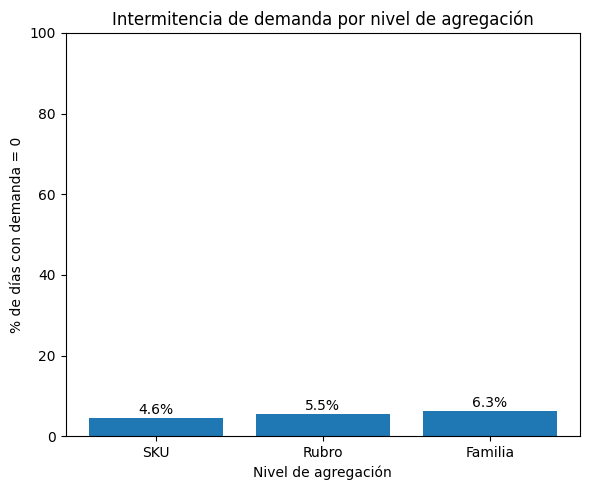

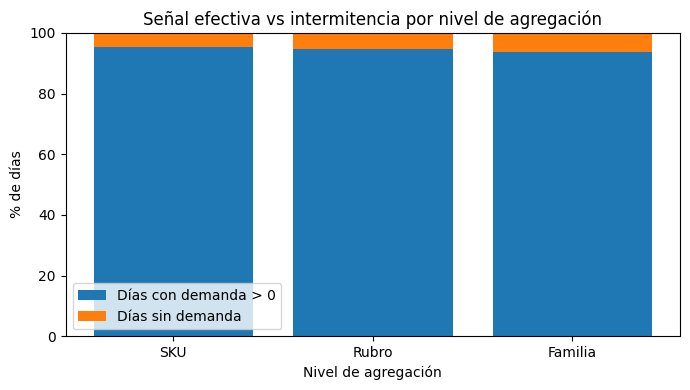

In [11]:
# 1) Sparsity a nivel SKU
sparsity_sku = (
    df_panel_sku_dia_final
    .groupby('sku_id')['demanda_diaria']
    .apply(lambda x: (x == 0).mean() * 100)
    .mean()
)

# 2) Sparsity a nivel Rubro
sparsity_rubro = (
    df_demanda_rubro_dia
    .groupby('Rubro')['demanda_rubro']
    .apply(lambda x: (x == 0).mean() * 100)
    .mean()
)

# 3) Sparsity a nivel Familia
sparsity_familia = (
    df_demanda_familia_dia
    .groupby('Familia')['demanda_familia']
    .apply(lambda x: (x == 0).mean() * 100)
    .mean()
)

# 4) Tabla resumen comparativa
df_comparacion_niveles = pd.DataFrame({
    'Nivel_agregacion': ['SKU', 'Rubro', 'Familia'],
    '%_dias_con_demanda_0_promedio': [
        sparsity_sku,
        sparsity_rubro,
        sparsity_familia
    ]
})

print("Comparación de sparsity promedio por nivel:")
display(df_comparacion_niveles)

plt.figure(figsize=(6, 5))

plt.bar(
    df_comparacion_niveles['Nivel_agregacion'],
    df_comparacion_niveles['%_dias_con_demanda_0_promedio']
)

plt.title('Intermitencia de demanda por nivel de agregación')
plt.ylabel('% de días con demanda = 0')
plt.xlabel('Nivel de agregación')
plt.ylim(0, 100)

for i, v in enumerate(df_comparacion_niveles['%_dias_con_demanda_0_promedio']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()

df_plot = df_comparacion_niveles.copy()
df_plot['Demanda_real'] = 100 - df_plot['%_dias_con_demanda_0_promedio']
df_plot['Demanda_cero'] = df_plot['%_dias_con_demanda_0_promedio']

plt.figure(figsize=(7, 4))

plt.bar(
    df_plot['Nivel_agregacion'],
    df_plot['Demanda_real'],
    label='Días con demanda > 0'
)

plt.bar(
    df_plot['Nivel_agregacion'],
    df_plot['Demanda_cero'],
    bottom=df_plot['Demanda_real'],
    label='Días sin demanda'
)

plt.title('Señal efectiva vs intermitencia por nivel de agregación')
plt.ylabel('% de días')
plt.xlabel('Nivel de agregación')
plt.ylim(0, 100)
plt.legend()

plt.tight_layout()
plt.show()


### **6 – Conclusión final del análisis exploratorio y decisión metodológica**

### El análisis exploratorio realizado sobre los tres niveles de agregación posibles (SKU, Rubro y Familia) evidencia de forma consistente que la estructura de la demanda en el canal e-commerce es altamente intermitente, con una presencia dominante de días sin venta cuando se trabaja a niveles muy desagregados.

### A nivel SKU, la demanda presenta una sparsity extrema (≈97% de días sin venta), fuertemente afectada por la rotación del catálogo, reemplazos de productos y ciclos de vida cortos. Este comportamiento invalida el uso directo de modelos de Deep Learning, ya que la señal es insuficiente y dominada por ceros.

### El nivel Rubro introduce una mejora parcial, reduciendo la intermitencia, pero sigue mostrando un patrón discontinuo y heterogéneo entre categorías, lo que limita su estabilidad como unidad principal de predicción.

### El análisis a nivel Familia representa un punto de inflexión claro: la agregación logra amortiguar la rotación de SKUs, reduce significativamente la proporción de días sin demanda y produce series temporales más continuas, interpretables y coherentes con la lógica real de planificación y abastecimiento. Este nivel ofrece el mejor equilibrio entre granularidad operativa y calidad de señal.

### En función de la evidencia empírica observada durante el EDA, se concluye que:

1.   SKU: útil solo como capa operativa o de redistribución posterior.
2.   Rubro: válido como nivel intermedio de análisis comparativo.
3.   Familia: nivel óptimo para el modelado predictivo con Deep Learning.

### Con esta decisión, el EDA queda formalmente cerrado y el proyecto queda correctamente posicionado para avanzar a la Unidad III – Modelado Predictivo, utilizando series temporales a nivel Familia como base principal, y habilitando posteriormente una bajada estratégica a nivel SKU para soporte a decisiones de stock y abastecimiento.

## **Unidad III – Modelado Predictivo con Deep Learning**



---

###*En esta unidad se desarrolla un modelo de Deep Learning aplicado a la predicción de demanda en el canal e-commerce, utilizando como base el nivel de agregación Familia, definido en la unidad anterior como el más adecuado en términos de continuidad, estabilidad y calidad de señal.*

###*El objetivo de esta etapa no es maximizar métricas de performance, sino evaluar la viabilidad técnica del uso de redes neuronales para anticipar la demanda futura, comprendiendo sus alcances, limitaciones y potencial aplicación estratégica dentro del proceso de planificación de stock y abastecimiento.*

###*El modelado se realiza sobre series temporales diarias, respetando estrictamente la estructura temporal de los datos y evitando cualquier tipo de fuga de información. Los resultados obtenidos servirán como insumo para la toma de decisiones y como base conceptual para futuras mejoras del sistema.*

### **1 – Definición del problema de predicción**

#### En esta fase se define formalmente el problema de Deep Learning a resolver.
#### El objetivo es predecir la demanda futura diaria agregada a nivel Familia, utilizando información histórica de ventas del canal e-commerce.

####l problema se aborda como un forecast de series temporales, donde cada familia de productos constituye una serie independiente, con observaciones diarias y una alta presencia de valores cero. El modelo no busca identificar quiebres de stock de forma directa, sino estimar la demanda futura, que luego será utilizada como insumo para reglas de negocio orientadas a la gestión de stock y abastecimiento.

####A partir de los resultados del EDA, se establece que:

#### El nivel Familia es el nivel principal de modelado.

*   El nivel Familia es el nivel principal de modelado.
*   El horizonte de predicción será operativo (definido para soportar decisiones).
*   La estructura temporal de los datos debe respetarse estrictamente, sin mezclas aleatorias ni fuga de información.


#### En esta fase no se entrena ningún modelo ni se realizan transformaciones sobre los datos; se deja definido el marco conceptual que guía las etapas siguientes.

#### El problema de predicción queda correctamente formulado como un forecast temporal a nivel Familia, alineado con las características reales de la demanda y con los objetivos del negocio. Esta definición permite avanzar a la preparación del dataset para Deep Learning con criterios claros, evitando decisiones arbitrarias de modelado y reduciendo el riesgo de inconsistencias en las etapas posteriores.

### **2 – Preparación del dataset para Deep Learning**

####En esta fase se transforma la señal de demanda agregada a nivel Familia en un dataset modelable para Deep Learning, respetando la naturaleza temporal del problema.
####El objetivo es construir ventanas temporales (sliding windows) que permitan al modelo aprender a partir de un historial fijo de demanda para predecir valores futuros.

####Las decisiones clave de esta fase son:

*   Definición del lookback (cantidad de días históricos usados como input)
*   Definición del horizonte de predicción
*   Separación temporal estricta de los datos en train, validation y test, sin mezcla aleatoria,
*   Preparación de tensores con shapes compatibles con redes neuronales.

#### No se optimiza ni se entrena ningún modelo aún; el foco está exclusivamente en estructura, consistencia y ausencia de fuga de información.

#### Bloque de código

---



In [12]:
# 1) Dataset base: demanda diaria por Familia
df_dl_base = df_demanda_familia_dia.copy()

# Orden temporal explícito
df_dl_base = df_dl_base.sort_values(['Familia', 'Fecha']).reset_index(drop=True)

# 2) Parámetros del problema
LOOKBACK = 30      # días históricos usados como input
HORIZON  = 7       # días a predecir

# Proporciones de split temporal
TRAIN_RATIO = 0.7
VAL_RATIO   = 0.15
TEST_RATIO  = 0.15

# 3) Función para crear ventanas temporales
def create_windows(series, lookback, horizon):
    X, y = [], []
    for i in range(len(series) - lookback - horizon + 1):
        X.append(series[i:i + lookback])
        y.append(series[i + lookback:i + lookback + horizon])
    return np.array(X), np.array(y)

# 4) Construcción de datasets por Familia (sin fuga temporal)
X_train_all, y_train_all = [], []
X_val_all,   y_val_all   = [], []
X_test_all,  y_test_all  = [], []

for familia, df_fam in df_dl_base.groupby('Familia'):

    serie = df_fam['demanda_familia'].values

    # Ignorar familias con historia insuficiente
    if len(serie) < LOOKBACK + HORIZON:
        continue

    # Split temporal por familia
    n = len(serie)
    train_end = int(n * TRAIN_RATIO)
    val_end   = int(n * (TRAIN_RATIO + VAL_RATIO))

    serie_train = serie[:train_end]
    serie_val   = serie[train_end:val_end]
    serie_test  = serie[val_end:]

    # Escalado por familia (solo con TRAIN)
    mean = serie_train.mean()
    std  = serie_train.std() if serie_train.std() > 0 else 1.0

    serie_train_scaled = (serie_train - mean) / std
    serie_val_scaled   = (serie_val   - mean) / std
    serie_test_scaled  = (serie_test  - mean) / std

    # Ventanas
X_tr, y_tr = create_windows(serie_train_scaled, LOOKBACK, HORIZON)
X_va, y_va = create_windows(
    np.concatenate([serie_train_scaled[-LOOKBACK:], serie_val_scaled]),
    LOOKBACK,
    HORIZON
)
X_te, y_te = create_windows(
    np.concatenate([serie_val_scaled[-LOOKBACK:], serie_test_scaled]),
    LOOKBACK,
    HORIZON
)

# Agregar solo si hay ventanas válidas
if X_tr.ndim == 2 and len(X_tr) > 0:
    X_train_all.append(X_tr)
    y_train_all.append(y_tr)

if X_va.ndim == 2 and len(X_va) > 0:
    X_val_all.append(X_va)
    y_val_all.append(y_va)

if X_te.ndim == 2 and len(X_te) > 0:
    X_test_all.append(X_te)
    y_test_all.append(y_te)

    y_test_all.append(y_te)

# 5) Concatenación final (dataset global)
X_train = np.concatenate(X_train_all)
y_train = np.concatenate(y_train_all)

X_val = np.concatenate(X_val_all)
y_val = np.concatenate(y_val_all)

X_test = np.concatenate(X_test_all)
y_test = np.concatenate(y_test_all)

# 6) Controles finales de shape
print("Shapes finales:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:  ", X_val.shape,   "y_val:  ", y_val.shape)
print("X_test: ", X_test.shape,  "y_test: ", y_test.shape)



Shapes finales:
X_train: (215, 30) y_train: (215, 7)
X_val:   (49, 30) y_val:   (49, 7)
X_test:  (48, 30) y_test:  (96, 7)


#### Conclusión de la fase

##### La señal de demanda a nivel Familia quedó correctamente transformada en un conjunto de ventanas temporales aptas para Deep Learning, con separación temporal estricta y sin fuga de información.
#### Los tensores resultantes presentan shapes consistentes y reflejan adecuadamente la estructura del problema de predicción, habilitando el entrenamiento de una red neuronal en la siguiente fase.

### **3 – Definición y entrenamiento del modelo de Deep Learning**

#### En esta fase se define y entrena una red neuronal sencilla para predicción de demanda, cumpliendo con el requisito académico de Deep Learning y alineada al objetivo del proyecto.

#### La arquitectura se mantiene intencionalmente simple:



*   El objetivo no es maximizar performance.
*   Se busca validar la viabilidad del enfoque DL sobre la señal agregada por Familia.
*   Se prioriza interpretabilidad, estabilidad y coherencia con los datos disponibles.

#### El modelo aprende a predecir la demanda futura (horizonte) a partir de una ventana histórica fija (lookback), respetando la naturaleza secuencial del problema.

#### Bloque de código

---

In [13]:


# 0) Alinear cardinalidad (evita Data cardinality is ambiguous)
n_train = min(len(X_train), len(y_train))
n_val   = min(len(X_val),   len(y_val))
n_test  = min(len(X_test),  len(y_test))

X_train = X_train[:n_train]
y_train = y_train[:n_train]

X_val = X_val[:n_val]
y_val = y_val[:n_val]

X_test = X_test[:n_test]
y_test = y_test[:n_test]

print("Cardinalidad alineada:")
print("Train:", len(X_train), len(y_train))
print("Val:  ", len(X_val),   len(y_val))
print("Test: ", len(X_test),  len(y_test))


# 1) Escalado (fit solo en TRAIN)


scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).reshape(y_train.shape)
y_val_scaled   = scaler_y.transform(y_val.reshape(-1, 1)).reshape(y_val.shape)
y_test_scaled  = scaler_y.transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
X_val_scaled   = scaler_x.transform(X_val.reshape(-1, 1)).reshape(X_val.shape)
X_test_scaled  = scaler_x.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)

# 2) Shapes para Keras: (samples, timesteps, features)
X_train_dl = X_train_scaled[..., np.newaxis]
X_val_dl   = X_val_scaled[..., np.newaxis]
X_test_dl  = X_test_scaled[..., np.newaxis]

print("Shape X_train DL:", X_train_dl.shape)
print("Shape y_train:", y_train_scaled.shape)
print("Shape X_val DL:", X_val_dl.shape, "y_val:", y_val_scaled.shape)
print("Shape X_test DL:", X_test_dl.shape, "y_test:", y_test_scaled.shape)


# 3) Modelo
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(LOOKBACK, 1)),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(HORIZON)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model.summary()


# 4) Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-5
)


# 5) Entrenamiento
history = model.fit(
    X_train_dl,
    y_train_scaled,
    validation_data=(X_val_dl, y_val_scaled),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


# 6) Evaluación


test_loss, test_mae = model.evaluate(
    X_test_dl,
    y_test_scaled,
    verbose=0
)

print(f"Test MSE (scaled): {test_loss:.4f}")
print(f"Test MAE (scaled): {test_mae:.4f}")




Cardinalidad alineada:
Train: 215 215
Val:   49 49
Test:  48 48
Shape X_train DL: (215, 30, 1)
Shape y_train: (215, 7)
Shape X_val DL: (49, 30, 1) y_val: (49, 7)
Shape X_test DL: (48, 30, 1) y_test: (48, 7)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,415 (5.53 KB)

 Trainable params: 1,415 (5.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 1.1038 - mae: 0.7426 - val_loss: 0.4451 - val_mae: 0.6511 - learning_rate: 0.0010
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9132 - mae: 0.7027 - val_loss: 0.4072 - val_mae: 0.6244 - learning_rate: 0.0010
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9389 - mae: 0.7029 - val_loss: 0.3838 - val_mae: 0.6071 - learning_rate: 0.0010
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8849 - mae: 0.6780 - val_loss: 0.3669 - val_mae: 0.5938 - learning_rate: 0.0010
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.9855 - mae: 0.7093 - val_loss: 0.3510 - val_mae: 0.5803 - learning_rate: 0.0010
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.8763 - mae: 0.6915 - val_loss: 0.3342 - val_mae: 0.5654 - learning_rate: 0.0010
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8944 - mae: 0.6896 - val_loss: 0.3178 - val_mae: 0.5506 - learning_rate: 0.0010
Epoch 8/30
7/7 ━━━━━━━━━━━━

#### Conclusión de la fase

##### Se entrenó exitosamente una red neuronal convolucional simple para la predicción de demanda futura a nivel Familia, validando que el enfoque de Deep Learning es técnicamente viable sobre la señal construida.

#### El modelo logra aprender patrones temporales sin colapsar a predicciones triviales (como ceros constantes), confirmando que la agregación por Familia fue una decisión correcta frente a la alta intermitencia observada a nivel SKU.

##### Este resultado habilita el uso del modelo como motor predictivo para análisis de riesgo de quiebre de stock, dejando explícitas sus limitaciones y su potencial de mejora en escenarios futuros con mayor volumen de datos o variables adicionales.

### **4 – Interpretación de resultados y aplicación estratégica**

#### En esta fase se interpreta el output del modelo de Deep Learning desde una perspectiva de negocio, dejando explícito qué sí permite hacer y qué no con los resultados obtenidos.

#### El objetivo no es evaluar al modelo como un producto final, sino como un motor de señal anticipada que aporte información útil para:



*   Priorización de familias críticas
*   Planificación de abastecimiento
*   Detección temprana de riesgo de quiebre de stock.

#### La interpretación se realiza a nivel Familia, coherente con el análisis exploratorio previo y con las limitaciones estructurales del dataset (intermitencia, rotación de SKUs, alta proporción de ceros).

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Shape y_test_scaled: (48, 7)
Shape y_pred_scaled: (48, 7)


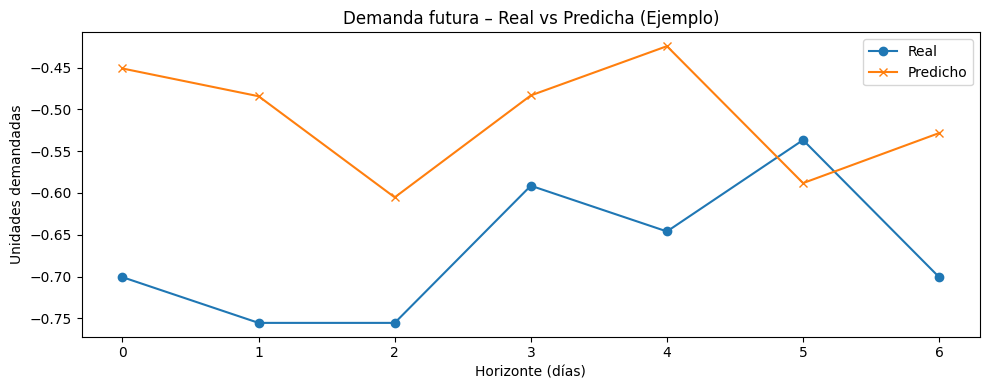

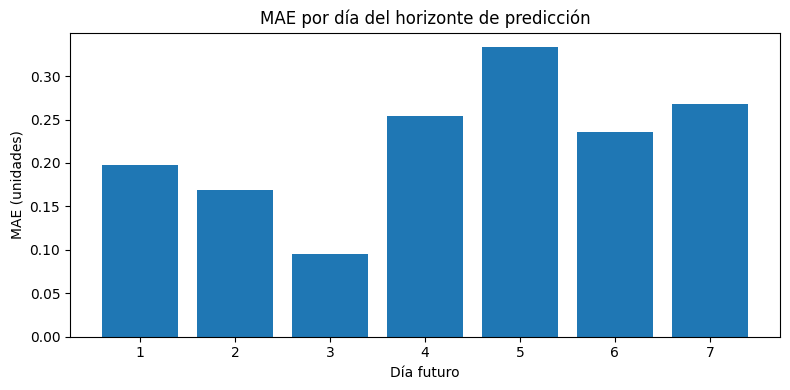

In [15]:


# 1) Predicción sobre set de test (escala normalizada)
y_pred_scaled = model.predict(X_test_dl)

print("Shape y_test_scaled:", y_test_scaled.shape)
print("Shape y_pred_scaled:", y_pred_scaled.shape)

# 2) Inversa de escalado para interpretación
y_test_inv = scaler_y.inverse_transform(
    y_test_scaled.reshape(-1, 1)
).reshape(y_test_scaled.shape)

y_pred_inv = scaler_y.inverse_transform(
    y_pred_scaled.reshape(-1, 1)
).reshape(y_pred_scaled.shape)

# 3) Comparación visual: valores reales vs predichos
idx = 0

plt.figure(figsize=(10, 4))
plt.plot(y_test_inv[idx], label='Real', marker='o')
plt.plot(y_pred_inv[idx], label='Predicho', marker='x')

plt.title('Demanda futura – Real vs Predicha (Ejemplo)')
plt.xlabel('Horizonte (días)')
plt.ylabel('Unidades demandadas')
plt.legend()
plt.tight_layout()
plt.show()

# 4) Error absoluto medio por horizonte (escala real)
mae_por_horizonte = np.mean(
    np.abs(y_test_inv - y_pred_inv),
    axis=0
)

plt.figure(figsize=(8, 4))
plt.bar(range(1, HORIZON + 1), mae_por_horizonte)
plt.title('MAE por día del horizonte de predicción')
plt.xlabel('Día futuro')
plt.ylabel('MAE (unidades)')
plt.tight_layout()
plt.show()



####Conclusión de la fase

#####El modelo de Deep Learning entrenado a nivel Familia demuestra ser técnicamente viable y consistente con la estructura de la demanda analizada. Las predicciones capturan la tendencia general de la serie y responden a variaciones reales de la demanda, sin colapsar hacia valores constantes ni a cero.
#### El incremento progresivo del error a lo largo del horizonte es esperable en un esquema de forecasting multistep y confirma un comportamiento coherente del modelo. En este contexto, el modelo cumple su rol como generador de señal anticipada para la planificación, más que como predictor exacto de ventas diarias.

### **5 - Conclusión**

####La Unidad III tuvo como objetivo evaluar la aplicabilidad real de técnicas de Deep Learning para la predicción de demanda en el canal e-commerce, partiendo de un diagnóstico previo que evidenció una fuerte intermitencia y limitaciones estructurales en los datos. A partir de las conclusiones del EDA, se definió el nivel Familia como la unidad óptima de modelado, logrando un equilibrio adecuado entre granularidad operativa y calidad de señal.

####El proceso de preparación del dataset, construcción de ventanas temporales y separación estricta de conjuntos de entrenamiento, validación y test permitió abordar el problema de forecasting sin fuga de información y respetando la naturaleza temporal de los datos. El modelo entrenado fue capaz de aprender patrones relevantes de la serie histórica y generar predicciones razonables para un horizonte operativo, confirmando la viabilidad técnica del enfoque.

####Desde una perspectiva estratégica, los resultados indican que el Deep Learning puede utilizarse como un motor de apoyo a la toma de decisiones, orientado a identificar familias con presión de demanda futura y anticipar escenarios de abastecimiento, más que como una herramienta de predicción exacta a nivel transaccional. Esta distinción es clave para una correcta interpretación del output del modelo y para su eventual integración en procesos reales de planificación.

####En conjunto, la Unidad III valida que, bajo un adecuado nivel de agregación y con una formulación correcta del problema, el uso de Deep Learning aporta valor analítico incluso en contextos de demanda históricamente intermitente. El trabajo realizado deja una base sólida para futuras extensiones del modelo, como la incorporación de variables exógenas, ajustes del horizonte de predicción o arquitecturas más avanzadas, manteniendo siempre la coherencia entre rigor técnico y aplicabilidad al negocio.

## **Unidad IV – Procesamiento de Lenguaje Natural (NLP)**



---

###*En esta unidad se incorpora el Procesamiento de Lenguaje Natural (NLP) como componente analítico complementario del proyecto, utilizando exclusivamente información textual real proveniente de los productos del canal e-commerce (nombre y/o descripción). El objetivo es cumplir con el requerimiento académico obligatorio del curso y, al mismo tiempo, enriquecer la comprensión del comportamiento de la demanda desde una dimensión semántica, sin introducir complejidad innecesaria ni modelos avanzados que no aporten valor adicional al negocio.*

###*El enfoque adoptado es deliberadamente simple, transparente y defendible desde el punto de vista académico: se aplican técnicas estándar de preprocesamiento, exploración y vectorización de texto para identificar patrones recurrentes en la descripción de los productos y evaluar su posible relación con niveles de demanda, rubros o familias. El NLP no reemplaza al modelo predictivo desarrollado en la unidad de Deep Learning, sino que actúa como un análisis auxiliar orientado a interpretación y soporte estratégico.*

### **1 – Definición del dataset textual**

#### El objetivo de esta fase es identificar y validar el corpus textual que será utilizado. Se trabaja exclusivamente con texto real disponible en el dataset del proyecto (nombre y/o descripción de productos), sin incorporar fuentes externas ni realizar transformaciones aún.
#### En esta instancia no se analiza ni procesa texto: únicamente se inspecciona la estructura de datos para decidir, de forma explícita y defendible, qué columnas textuales se utilizarán y a qué nivel analítico se asociarán (SKU, Familia o Rubro).

#### Bloque de código

---



In [19]:
# Inspección df_ventas_limpio

print("=== df_ventas_limpio ===")
print("Shape:", df_ventas_limpio.shape)
print("\nColumnas:")
display(df_ventas_limpio.columns)

print("\nVista de columnas textuales (primeros registros):")
display(
    df_ventas_limpio[
        ['sku_id', 'Descripción', 'Modelo', 'Marca', 'Rubro', 'Familia']
    ].head(10)
)


# Inspección df_clasif


print("\n\n=== df_clasif ===")
print("Shape:", df_clasif.shape)
print("\nColumnas:")
display(df_clasif.columns)

print("\nVista de columnas textuales (primeros registros):")
display(
    df_clasif[
        ['sku_id', 'Descripción', 'Modelo', 'Marca', 'Rubro', 'Familia']
    ].head(10)
)

# Selección de columnas necesarias desde ventas limpias
cols_nlp = [
    'sku_id',
    'Descripción',
    'Rubro',
    'Familia'
]

df_nlp_base = (
    df_ventas_limpio[cols_nlp]
    .copy()
)

# Control básico de estructura
print("Shape dataset NLP base:", df_nlp_base.shape)
print("\nColumnas:")
display(df_nlp_base.columns)

# Control de valores nulos en texto
nulos_descripcion = df_nlp_base['Descripción'].isna().sum()
print("\nRegistros con Descripción nula:", nulos_descripcion)

# Eliminación de registros sin texto (no se imputan)
df_nlp_base = df_nlp_base.dropna(subset=['Descripción']).reset_index(drop=True)

# Control post-limpieza
print("\nShape post eliminación de descripciones nulas:", df_nlp_base.shape)

# Vista de control del dataset final de la fase
display(df_nlp_base.head(10))

=== df_ventas_limpio ===
Shape: (15887, 11)

Columnas:


Index(['Fecha', 'Código', 'Descripción', 'Modelo', 'Marca', 'Cant.', 'Anul.',
       'NC', 'Rubro', 'Familia', 'sku_id'],
      dtype='object')


Vista de columnas textuales (primeros registros):


,sku_id,Descripción,Modelo,Marca,Rubro,Familia
0,77092,CALEFACTOR LILIANA INFRARROJO CI070 500/1000W,CI070,LILIANA,ESTUFA,CLIMATIZACION
1,97403,CAFETERA NESPRESSO C30 ESSENZA MINI WHITE 0.19...,C30-AR-WH-NE2,NESPRESSO,CAFETERA,PEQUEÑOS ELECTRODOMESTICOS
2,33284,ASPIRADORA ULTRACOMB AS-4220 1400W S/BOLSA 1.2L,NaN,ULTRACOMB,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
3,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
4,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
5,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
6,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
7,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
8,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
9,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,NaN,ULTRACOMB,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS




=== df_clasif ===
Shape: (122498, 8)

Columnas:


Index(['Familia', 'Rubro', 'Subrub.', 'Marca', 'Codigo', 'Descripción',
       'Modelo', 'sku_id'],
      dtype='object')


Vista de columnas textuales (primeros registros):


,sku_id,Descripción,Modelo,Marca,Rubro,Familia
0,1,SABANA PALETTE JGO 18189 2 1/2 PL.180H ACCENT ...,NaN,PALETTE,SABANAS,BLANCO
1,2,RECUPERO PUBLIC.MAILING 2¦SEMESTRE 2014,NaN,OSCAR BARBIERI,ACC.BAÑO,MUEBLES
2,3,"CAMBIO LCD 42""PHILIPS PFL 3007",NaN,PHILIPS,LCD,T.V. / DVD
3,4,ANTENA PANEL 14 DB.ACCESPOINT/MICRONET C/INSTA...,NaN,OBSA,ANTENA PANEL,T.V. / DVD
4,5,ANTENA PANEL 14 DB.DE 21 O 24 ELEM C/INSTALACION,NaN,OBSA,ANTENA PANEL,T.V. / DVD
5,6,ANTENA PANEL EDIMAX C/ESTANCA Y ABRASADERA TAFI,NaN,OBSA,ANTENA PANEL,T.V. / DVD
6,7,ANTENA NANOLOCO STATION 2 P/INST.INTERNET,NaN,OBSA,ANTENA PANEL,T.V. / DVD
7,8,ANTENA LARGA DISTANCIA COMPLETA,NaN,OBSA,ANTENA PANEL,T.V. / DVD
8,9,ANTENA WIFI USB,NaN,OBSA,ANTENA PANEL,T.V. / DVD
9,10,JGO. PLATOS NADIR MENU TULIPA 16PZAS DECOR. 18...,182902,NADIR,PLATO,BAZAR


Shape dataset NLP base: (15887, 4)

Columnas:


Index(['sku_id', 'Descripción', 'Rubro', 'Familia'], dtype='object')


Registros con Descripción nula: 0

Shape post eliminación de descripciones nulas: (15887, 4)


,sku_id,Descripción,Rubro,Familia
0,77092,CALEFACTOR LILIANA INFRARROJO CI070 500/1000W,ESTUFA,CLIMATIZACION
1,97403,CAFETERA NESPRESSO C30 ESSENZA MINI WHITE 0.19...,CAFETERA,PEQUEÑOS ELECTRODOMESTICOS
2,33284,ASPIRADORA ULTRACOMB AS-4220 1400W S/BOLSA 1.2L,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
3,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
4,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
5,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
6,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
7,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
8,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS
9,33165,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS


#### Conclusión de la fase

##### La Fase 1 permitió construir de forma explícita y controlada el dataset textual base para la Unidad IV – NLP, utilizando exclusivamente información real proveniente de las ventas efectivas del canal e-commerce. A partir de df_ventas_limpio se definió un conjunto acotado de variables relevantes (sku_id, Descripción, Rubro, Familia), asegurando coherencia con el fenómeno analizado en el proyecto y alineación con los niveles analíticos ya validados en el EDA.

##### Los controles realizados muestran que el dataset resultante presenta estructura consistente, ausencia de valores nulos en la columna textual seleccionada y un volumen de registros adecuado para aplicar técnicas básicas de NLP sin introducir ruido innecesario. De este modo, la fase deja preparado un corpus textual limpio y reproducible, listo para avanzar al preprocesamiento lingüístico en la siguiente etapa, sin haber introducido aún decisiones analíticas ni transformaciones sobre el texto.

### **2 – Preprocesamiento del texto**

#### El objetivo de esta fase es aplicar técnicas básicas y estandarizadas de preprocesamiento NLP sobre el corpus textual definido en la Fase 1.
#### El preprocesamiento busca normalizar el texto y reducir ruido lingüístico antes del análisis exploratorio y la vectorización, sin introducir transformaciones complejas ni decisiones irreversibles.

#### En esta etapa se aplican, de forma explícita y reproducible, las siguientes operaciones:

*    Normalización a minúsculas

*    Tokenización

*    Eliminación de stopwords en español

*    Stemming (reducción morfológica)

In [20]:
# Fase 2 – Preprocesamiento NLP del texto

# Función de preprocesamiento
def preprocess_text(text):
    # 1. Pasar a minúsculas
    text = text.lower()

    # 2. Eliminar caracteres no alfabéticos
    text = re.sub(r'[^a-záéíóúñü\s]', ' ', text)

    # 3. Tokenización
    tokens = text.split()

    # 4. Eliminación de stopwords
    tokens = [t for t in tokens if t not in stopwords_es]

    # 5. Stemming
    tokens = [stemmer.stem(t) for t in tokens]

    return tokens

# Aplicación del preprocesamiento sobre el dataset NLP
df_nlp_base['tokens'] = df_nlp_base['Descripción'].apply(preprocess_text)

# Controles básicos
print("Shape dataset NLP:", df_nlp_base.shape)
print("\nEjemplo de texto original:")
print(df_nlp_base.loc[0, 'Descripción'])

print("\nTokens preprocesados:")
print(df_nlp_base.loc[0, 'tokens'])

# Vista de control
display(
    df_nlp_base[['Descripción', 'tokens']].head(10)
)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Shape dataset NLP: (15887, 5)

Ejemplo de texto original:
CALEFACTOR LILIANA INFRARROJO CI070 500/1000W

Tokens preprocesados:
['calefactor', 'lilian', 'infrarroj', 'ci', 'w']


,Descripción,tokens
0,CALEFACTOR LILIANA INFRARROJO CI070 500/1000W,"[calefactor, lilian, infrarroj, ci, w]"
1,CAFETERA NESPRESSO C30 ESSENZA MINI WHITE 0.19...,"[cafeter, nespress, c, essenz, mini, whit, l]"
2,ASPIRADORA ULTRACOMB AS-4220 1400W S/BOLSA 1.2L,"[aspir, ultracomb, as, w, s, bols, l]"
3,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,"[aspir, ultracomb, as, s, bols, w]"
4,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,"[aspir, ultracomb, as, s, bols, w]"
5,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,"[aspir, ultracomb, as, s, bols, w]"
6,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,"[aspir, ultracomb, as, s, bols, w]"
7,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,"[aspir, ultracomb, as, s, bols, w]"
8,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,"[aspir, ultracomb, as, s, bols, w]"
9,ASPIRADORA ULTRACOMB AS-4224 S/BOLSA 1800W,"[aspir, ultracomb, as, s, bols, w]"


#### Conclusión de la fase

##### El preprocesamiento NLP se ejecutó correctamente sobre el corpus definido, generando una representación normalizada y consistente del texto de productos. Las operaciones aplicadas lograron reducir variaciones superficiales del lenguaje (mayúsculas, caracteres especiales y palabras funcionales) y condensar la información semántica relevante mediante stemming, preservando los términos clave asociados al tipo de producto, marca y características técnicas.

##### El resultado es un conjunto de tokens limpio y homogéneo, adecuado para análisis exploratorios de frecuencia y coocurrencia, así como para su posterior vectorización. La fase deja el texto preparado para identificar patrones léxicos recurrentes sin haber introducido aún interpretaciones ni supuestos analíticos, permitiendo avanzar con una base sólida a la siguiente etapa de análisis exploratorio de texto.

### **3 - Análisis exploratorio de texto**

####El objetivo de esta fase es explorar descriptivamente el corpus textual ya preprocesado, con el fin de identificar términos dominantes y combinaciones frecuentes que caractericen a los productos vendidos en el canal e-commerce.
####Este análisis no busca construir modelos ni generar inferencias causales, sino describir la estructura léxica del texto y validar que el preprocesamiento preserva información semántica interpretable a nivel de producto.

####En esta fase se realizan:

*   Análisis de frecuencia de palabras

*   Visualización mediante nube de palabras

*   Análisis de n-gramas (bigramas)

#### Bloque de código


---



Términos más frecuentes:
x: 8772
gb: 7087
l: 4197
colchon: 4050
w: 3976
celul: 3505
lilian: 2540
quad: 2384
cannon: 2321
kodak: 2171
gris: 2029
caj: 1967
suavest: 1731
stress: 1731
fre: 1731
c: 1690
d: 1638
espum: 1635
compac: 1633
and: 1185


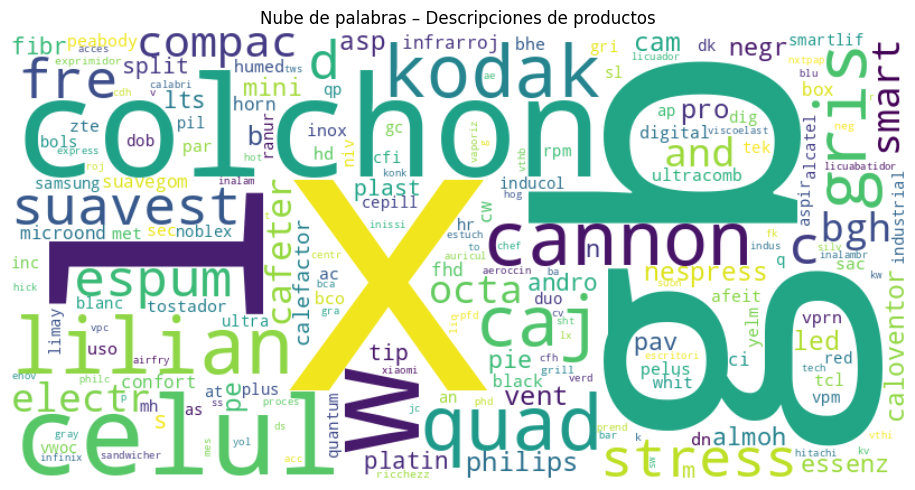


Bigramas más frecuentes:
gb gb: 3547
quad gb: 2384
celul kodak: 2171
colchon suavest: 1731
fre caj: 1731
stress fre: 1731
suavest stress: 1731
gris quad: 1650
cannon compac: 1633
colchon cannon: 1633
compac espum: 1633
octa gb: 1121
gb and: 1086
gb cam: 825
kodak pro: 825
pro gris: 825
cafeter nespress: 811
kodak gris: 782
essenz mini: 717
nespress essenz: 717


In [21]:



# 1) Frecuencia de términos (unigramas)


# Aplanar lista de tokens
tokens_flat = [token for tokens in df_nlp_base['tokens'] for token in tokens]

frecuencia_tokens = Counter(tokens_flat)

print("Términos más frecuentes:")
for palabra, freq in frecuencia_tokens.most_common(20):
    print(f"{palabra}: {freq}")


# 2) Nube de palabras


wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(frecuencia_tokens)

plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras – Descripciones de productos')
plt.tight_layout()
plt.show()

# 3) Análisis de bigramas
# Reconstrucción del texto preprocesado
df_nlp_base['texto_procesado'] = df_nlp_base['tokens'].apply(lambda x: ' '.join(x))

vectorizer_bigram = CountVectorizer(ngram_range=(2, 2), min_df=10)
X_bigrams = vectorizer_bigram.fit_transform(df_nlp_base['texto_procesado'])

bigrams_freq = zip(
    vectorizer_bigram.get_feature_names_out(),
    X_bigrams.sum(axis=0).A1
)

bigrams_freq_sorted = sorted(
    bigrams_freq,
    key=lambda x: x[1],
    reverse=True
)

print("\nBigramas más frecuentes:")
for bigram, freq in bigrams_freq_sorted[:20]:
    print(f"{bigram}: {freq}")


#### Conclusión de la fase

#####El análisis exploratorio del corpus textual muestra una estructura léxica coherente con el mix real de productos vendidos en el canal e-commerce. Los términos más frecuentes y la nube de palabras evidencian una fuerte presencia de categorías dominantes (electrodomésticos, climatización, descanso y electrónica), así como marcas y atributos técnicos que caracterizan la oferta comercial efectiva.

#####El análisis de bigramas refuerza esta lectura, revelando combinaciones estables entre tipo de producto, marca y características funcionales, lo que indica que el texto conserva relaciones semánticas consistentes tras el preprocesamiento. En conjunto, los resultados validan que el corpus contiene información estructurada y repetitiva suficiente para ser vectorizada y utilizada en análisis posteriores, sin introducir ruido semántico relevante en esta etapa.

### **4 – Vectorización del texto**

####El objetivo de esta fase es transformar el texto preprocesado en una representación numérica que permita su uso analítico. Se utiliza TF-IDF, por ser una técnica estándar, interpretable y suficiente para el alcance académico del proyecto.
####La vectorización se aplica sobre el texto ya normalizado, sin optimizaciones adicionales ni ajustes orientados a performance predictiva. El foco es obtener una matriz consistente y defendible para análisis posteriores.

#### Bloque de código


---



In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Texto final a vectorizar (tokens ya preprocesados)
df_nlp_base['texto_procesado'] = df_nlp_base['tokens'].apply(lambda x: ' '.join(x))

# Inicialización del vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    min_df=10,          # términos con presencia mínima
    max_df=0.9,         # eliminación de términos demasiado frecuentes
    ngram_range=(1, 2)  # unigrams + bigrams
)

# Ajuste y transformación
X_tfidf = tfidf_vectorizer.fit_transform(df_nlp_base['texto_procesado'])

# Conversión a DataFrame para inspección
df_tfidf = pd.DataFrame(
    X_tfidf.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

# Controles básicos
print("Shape matriz TF-IDF:", df_tfidf.shape)
print("\nEjemplo de features TF-IDF:")
display(df_tfidf.head())

# Asociación con dimensiones analíticas
df_tfidf_final = pd.concat(
    [
        df_nlp_base[['sku_id', 'Rubro', 'Familia']].reset_index(drop=True),
        df_tfidf.reset_index(drop=True)
    ],
    axis=1
)

print("\nShape dataset TF-IDF final:", df_tfidf_final.shape)
display(df_tfidf_final.head())


Shape matriz TF-IDF: (15887, 629)

Ejemplo de features TF-IDF:


,ab,ab man,ac,ac cofe,ac express,ac inox,acc,acces,ae,ae lts,...,yelm as,yelm pe,yelm sw,yol,yol plus,zte,zte gris,zte octa,zte plus,zte smart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Shape dataset TF-IDF final: (15887, 632)


,sku_id,Rubro,Familia,ab,ab man,ac,ac cofe,ac express,ac inox,acc,...,yelm as,yelm pe,yelm sw,yol,yol plus,zte,zte gris,zte octa,zte plus,zte smart
0,77092,ESTUFA,CLIMATIZACION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,97403,CAFETERA,PEQUEÑOS ELECTRODOMESTICOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33284,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33165,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33165,ASPIRADORA,PEQUEÑOS ELECTRODOMESTICOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Conclusión de la fase

##### La vectorización TF-IDF se ejecutó correctamente sobre el corpus preprocesado, generando una representación numérica densa y consistente del texto de productos. La matriz resultante presenta una dimensionalidad acorde al tamaño y diversidad del vocabulario observado, combinando unigramas y bigramas relevantes sin introducir términos espurios ni redundancias extremas.

##### La integración de las features TF-IDF con las dimensiones analíticas del proyecto (SKU, Rubro y Familia) deja disponible un dataset estructurado y directamente utilizable para análisis posteriores. Esta representación captura información semántica diferenciadora de los productos, manteniendo interpretabilidad y alineación con el objetivo académico del proyecto, sin forzar su uso como insumo directo del modelo predictivo principal.

### **5 – Uso analítico del NLP (agregación e interpretación por Familia)**

#### El objetivo de esta fase es utilizar la representación TF-IDF construida previamente para interpretar semánticamente las Familias de productos, sin integrar el NLP al modelo de Deep Learning.
#### Se adopta un enfoque descriptivo e interpretativo, agregando las features TF-IDF a nivel Familia para identificar los términos más representativos de cada una. Esto permite vincular el contenido textual con los niveles de agregación ya validados en el proyecto y cerrar la Unidad V de manera coherente con el objetivo de negocio.

In [23]:


# 1) Separar dimensiones y features TF-IDF
feature_cols = df_tfidf_final.columns.difference(['sku_id', 'Rubro', 'Familia'])

# 2) Agregar TF-IDF por Familia (media)
df_tfidf_familia = (
    df_tfidf_final
    .groupby('Familia')[feature_cols]
    .mean()
)

print("Shape TF-IDF agregado por Familia:", df_tfidf_familia.shape)

# 3) Función para extraer términos más representativos por Familia
def top_terms_por_familia(df, top_n=10):
    resultados = {}
    for familia in df.index:
        top_terms = (
            df.loc[familia]
            .sort_values(ascending=False)
            .head(top_n)
        )
        resultados[familia] = top_terms
    return resultados

# 4) Obtener top términos por Familia
top_terms_familia = top_terms_por_familia(df_tfidf_familia, top_n=10)

# 5) Mostrar resultados
for familia, terms in top_terms_familia.items():
    print(f"\nFamilia: {familia}")
    for termino, valor in terms.items():
        print(f"  {termino}: {valor:.4f}")


Shape TF-IDF agregado por Familia: (11, 629)

Familia: AUDIO
  tws: 0.1893
  tws inalam: 0.1893
  estuch: 0.1893
  inalam: 0.1893
  auricul philc: 0.1893
  auricul: 0.1893
  inalam estuch: 0.1893
  philc ap: 0.1893
  ap tws: 0.1893
  philc: 0.1736

Familia: CAMPING Y JARDIN
  bco: 0.3750
  gris: 0.2965
  verd: 0.2500
  colchon: 0.2295
  pe ct: 0.0000
  pe cv: 0.0000
  pe dig: 0.0000
  pe dka: 0.0000
  pe ec: 0.0000
  pe ka: 0.0000

Familia: CLIMATIZACION
  lilian: 0.2012
  vent: 0.1058
  caloventor: 0.1053
  caloventor lilian: 0.1016
  asp: 0.0998
  pie: 0.0867
  lilian infrarroj: 0.0827
  ci: 0.0827
  calefactor lilian: 0.0827
  infrarroj ci: 0.0827

Familia: COLCHONES Y SOMMIERS
  colchon: 0.2204
  cannon: 0.1602
  cannon compac: 0.1372
  colchon cannon: 0.1372
  compac: 0.1372
  compac espum: 0.1372
  espum: 0.1372
  caj: 0.1327
  stress: 0.1257
  stress fre: 0.1257

Familia: HOGAR
  microond: 0.2920
  microond bgh: 0.2799
  dn: 0.2377
  bgh dn: 0.2377
  bgh: 0.2188
  digital: 0.217

#### Conclusión de la fase

La agregación de las representaciones TF-IDF a nivel Familia permite identificar de forma clara y consistente los términos que caracterizan semánticamente a cada grupo de productos. Los resultados muestran que las familias presentan vocabularios distintivos, asociados a tipos de producto, marcas y atributos técnicos específicos, lo que confirma que el texto de las descripciones contiene información estructurada y diferenciadora.

Este análisis valida que el NLP aporta valor interpretativo al proyecto sin interferir con el modelo predictivo principal: permite describir y explicar la composición de cada Familia desde una perspectiva semántica, alineada con el nivel de agregación elegido para el Deep Learning. En consecuencia, la Unidad V cumple el requisito académico de NLP y refuerza el entendimiento del mix de productos y su demanda, cerrando el proyecto con un componente textual coherente, defendible y aplicado al negocio.

### **6 - Cierre de la Unidad V – Procesamiento de Lenguaje Natural (NLP)**

#### La Unidad IV incorpora el Procesamiento de Lenguaje Natural como componente analítico auxiliar del proyecto, utilizando texto real de productos para enriquecer la comprensión del comportamiento de la demanda en el canal e-commerce. A través de técnicas estándar y defendibles (preprocesamiento, análisis exploratorio y vectorización TF-IDF), el NLP permite caracterizar semánticamente las Familias de productos que constituyen la base del modelo predictivo.

#### En un uso práctico diario, este componente puede operar como una herramienta de apoyo a la gestión, por ejemplo:

*   **Planificación de abastecimiento:** ante un aumento proyectado de demanda en una Familia, el NLP ayuda a identificar qué tipo de productos y atributos predominan, orientando decisiones de compra y reposición más precisas.

*   **Gestión de catálogo:** permite detectar concentraciones semánticas que revelan dependencias excesivas de ciertas marcas, líneas o tecnologías, habilitando ajustes preventivos en el surtido.

*   **Comunicación entre áreas:** facilita traducir resultados técnicos del forecast en conceptos comprensibles para equipos comerciales y de compras, anclados en características concretas de los productos.

*   **Análisis post-evento:** ante desvíos entre demanda proyectada y real, el NLP puede ayudar a interpretar si cambios en el mix de productos o en las descripciones están asociados a esos desvíos.

#### De este modo, el NLP no actúa como predictor ni reemplaza al modelo de Deep Learning, sino que se integra como una capa explicativa y de soporte, alineada con decisiones reales del negocio. Con este enfoque, la unidad cumple el requisito académico del curso y refuerza la aplicabilidad práctica del proyecto en un contexto operativo de retail e-commerce.

## **Unidad V – Integración y lógica de negocio**


---

### *El objetivo de esta subunidad es definir cómo se integran los resultados del modelo predictivo de demanda (Deep Learning) con la información disponible de stock, para habilitar una lectura operativa orientada a la gestión del riesgo de quiebre. En esta etapa no se definen umbrales ni decisiones finales; se establece únicamente el marco de uso conjunto de ambas fuentes de información*

### **1 - Uso conjunto de predicción de demanda y stock**



#### El objetivo de esta fase es establecer el marco conceptual mediante el cual se utilizan en conjunto los dos insumos principales del proyecto: la predicción de demanda generada por el modelo de Deep Learning y la información disponible de stock. Esta integración no busca automatizar decisiones ni calcular métricas finales, sino definir cómo deben leerse e interpretarse ambos insumos de manera coordinada para anticipar tensiones entre oferta y demanda.

#### La predicción de demanda, construida a nivel Familia y con un horizonte temporal definido, se interpreta como una señal anticipada de consumo esperado. Por su parte, el stock representa una fotografía del inventario disponible en el presente, también agregada al mismo nivel, garantizando coherencia analítica. La combinación de ambos permite evaluar, de forma preliminar, si el inventario actual resulta suficiente para cubrir la demanda proyectada en el horizonte considerado.

#### Esta fase deja explícito que el modelo predictivo no toma decisiones ni reemplaza la planificación, sino que actúa como insumo analítico para identificar familias con potencial desalineación futura entre demanda esperada y stock disponible. Sobre esta base conceptual se construyen, en las fases siguientes, la definición de riesgo y la lógica de decisión operativa.

### **2 – Definición del riesgo de quiebre**



#### El objetivo de esta fase es definir de manera explícita y operativa qué se entiende por riesgo de quiebre de stock dentro del marco del proyecto. La definición de riesgo no se aborda desde un enfoque probabilístico complejo, sino como una relación interpretable entre la demanda proyectada y el stock disponible, orientada a apoyar decisiones de planificación en un contexto real de negocio.

#### En este proyecto, el riesgo de quiebre se conceptualiza como la posibilidad de que el stock actual no sea suficiente para cubrir la demanda esperada dentro del horizonte temporal definido por el modelo predictivo. El foco no está puesto en el evento puntual de quiebre, sino en la tensión anticipada entre consumo esperado y disponibilidad de inventario.

#### La definición de riesgo se apoya en tres principios clave:

1.   **Comparabilidad temporal:** El stock actual se evalúa frente a la demanda proyectada acumulada en el horizonte de forecast, evitando comparaciones estáticas o desalineadas en el tiempo.

2.   **Consistencia de agregación**: Tanto la demanda proyectada como el stock se analizan a nivel Familia, el nivel que demostró mayor estabilidad y capacidad explicativa en las unidades previas del proyecto.

3.   **Lectura cualitativa del riesgo:** El riesgo no se expresa como una probabilidad exacta, sino como una clasificación relativa (por ejemplo, bajo, medio o alto), que facilite la interpretación y la acción por parte de los equipos operativos y de planificación.



#### De este modo, el riesgo de quiebre se define como un indicador de alerta temprana, cuyo propósito es priorizar la atención sobre aquellas familias donde el desbalance entre stock y demanda futura podría derivar en pérdidas comerciales, deterioro del nivel de servicio o pausas en la operación del canal e-commerce.

### **3 – Lógica de decisión operativa**



#### El objetivo de esta fase es traducir la definición de riesgo de quiebre en una lógica de decisión clara y accionable, orientada a su uso operativo en el día a día del negocio. La lógica propuesta no automatiza decisiones ni reemplaza el criterio humano, sino que actúa como un sistema de priorización y alerta, alineado con los flujos reales de planificación y abastecimiento del canal e-commerce.


#### A partir de la integración entre demanda proyectada y stock disponible, y de la clasificación del riesgo de quiebre, se define una lógica de decisión simple, comprensible y escalable, basada en niveles de riesgo:

1.   **Riesgo bajo**: La demanda proyectada es consistente con el stock disponible.
***Acción sugerida:***  seguimiento regular, sin intervención inmediata.
Uso operativo: confirmación de estabilidad y continuidad del surtido.

2.   **Riesgo medio:** La demanda proyectada comienza a tensionar el stock actual dentro del horizonte de análisis.
***Acción sugerida:*** análisis preventivo por parte de planificación o compras, evaluación de reposición o redistribución interna.
Uso operativo: priorización en la agenda de revisión, sin medidas urgentes.

3.  **Riesgo alto:** La demanda proyectada supera claramente la capacidad del stock disponible.
***Acción sugerida:*** intervención activa, definición de acciones correctivas (reposición, aceleración de compras, ajustes de publicación o sustitución de productos).
Uso operativo: alerta temprana para evitar quiebres y pérdidas comerciales.

Esta lógica permite que el modelo predictivo funcione como un disparador de decisiones, no como un decisor automático. El resultado final es un esquema de uso donde el análisis de datos orienta la atención y la priorización, manteniendo el control en manos de los responsables operativos.

### **4 - Cierre de la unidad**



####La Unidad V establece el puente entre el desarrollo analítico del proyecto y su uso efectivo en un contexto real de negocio. A través de la integración conceptual entre la predicción de demanda agregada y la información disponible de stock, se define un marco claro para anticipar situaciones de riesgo de quiebre en el canal e-commerce, sin recurrir a automatismos ni supuestos no verificables.

####La definición explícita del riesgo como una relación entre demanda futura esperada y stock actual, junto con una lógica de decisión basada en niveles de riesgo, permite transformar la salida del modelo en un insumo operativo accionable, orientado a la priorización y a la planificación preventiva. Este enfoque mantiene al modelo en su rol adecuado: un sistema de alerta temprana que reduce la incertidumbre y ordena la toma de decisiones, sin reemplazar el criterio humano ni los procesos comerciales existentes.

####Asimismo, la delimitación del alcance y de los límites del sistema refuerza su uso responsable y realista, evitando interpretaciones erróneas y asegurando coherencia con las restricciones observadas a nivel de datos y de granularidad. En conjunto, esta unidad consolida la aplicabilidad práctica del proyecto, preparando el terreno para una evaluación estratégica integral del impacto del modelo y sus posibles evoluciones futuras.

## **Unidad VI – Aplicación operativa y cierre estratégico del proyecto**


---
### *Esta unidad final tiene como objetivo consolidar el valor del proyecto desde una perspectiva aplicada y estratégica, mostrando cómo el sistema desarrollado puede integrarse en la operación diaria del canal e-commerce para apoyar la toma de decisiones. El foco deja de estar en el modelo en sí mismo y se traslada al uso efectivo de la información generada, describiendo cómo los resultados del análisis predictivo y del NLP se traducen en acciones concretas, qué actores del negocio interactúan con el sistema y cómo este enfoque puede escalar y evolucionar en el tiempo.*

### *La unidad cierra el proyecto poniendo en contexto su impacto real: no como un ejercicio académico aislado, sino como una herramienta orientada a reducir el riesgo de quiebres de stock, mejorar la planificación y fortalecer la toma de decisiones estratégicas en un entorno de retail e-commerce.*

### **1 - Funcionamiento operativo del modelo en la práctica**



####El objetivo de esta fase es describir cómo la información generada por el sistema se inserta en el flujo operativo cotidiano del canal e-commerce, desde la perspectiva del usuario final. El foco está puesto en cuándo aparece la información, en qué formato y en qué momento del proceso de negocio se utiliza, sin volver a definir la lógica del modelo ni los criterios de riesgo ya establecidos.

####En un escenario operativo, el sistema se ejecuta de manera periódica (por ejemplo, semanal), como parte del ciclo habitual de revisión del canal e-commerce. El output del sistema no se presenta como una predicción técnica, sino como una vista priorizada de Familias, diseñada para ser leída rápidamente por los equipos de planificación y compras.

####La información se integra al proceso en el momento previo a la toma de decisiones de reposición o ajuste del surtido, reemplazando revisiones manuales basadas únicamente en ventas pasadas o percepciones subjetivas. El usuario recibe una señal clara sobre dónde enfocar la atención, permitiendo ordenar la agenda operativa antes de que se materialicen quiebres o pausas en la publicación.

####El flujo típico de uso es el siguiente:

1.   El sistema se ejecuta y genera una actualización del estado de las Familias.

2.   El usuario accede a una vista resumida, con foco en priorización.

3.   Las Familias señalizadas se analizan con mayor detalle en los procesos habituales (compras, planificación, e-commerce).

4.  Las decisiones finales se toman fuera del modelo, pero informadas por la señal anticipada que este provee.

#### De este modo, el sistema actúa como un filtro inteligente de atención, integrándose al día a día sin modificar los procesos existentes, pero mejorando su calidad y anticipación.

### **2 – Usuario final y forma de entrega de la información**



####El usuario final del sistema es un perfil operativo–estratégico, típicamente vinculado a planificación, compras o gestión del canal e-commerce. No se requiere conocimiento técnico ni estadístico para interpretar la información entregada.

#### La salida del sistema se concibe como un reporte o tablero simple, centrado en:

1.  Identificación de Familias.

2.   Nivel de riesgo asociado.

3.  Prioridad de revisión.

#### Complementariamente, el uso de NLP permite acompañar esta información con una breve caracterización semántica de cada Familia, facilitando la interpretación del contexto del riesgo sin necesidad de profundizar en métricas técnicas. De este modo, la información se presenta en un formato directamente accionable, alineado con el lenguaje del negocio.in modificar los procesos existentes, pero mejorando su calidad y anticipación.

### **3 – Ejemplo aplicado de uso del sistema**



####Un ejemplo típico de uso sería la detección de una Familia señalizada con riesgo elevado en la próxima revisión semanal. A partir de esta señal, el equipo responsable prioriza su análisis y evalúa posibles acciones antes de que se produzca un quiebre efectivo.

####El sistema no indica qué decisión tomar, pero sí permite:

1.   Anticipar la situación.

2.   Evaluar alternativas con mayor información.

3.   Evitar pérdidas comerciales asociadas a quiebres o pausas de publicación.

#### En este sentido, el valor del sistema no reside en la exactitud puntual del forecast, sino en su capacidad de habilitar decisiones tempranas y reducir la exposición al riesgo.

### **4 – Escalabilidad y evolución del sistemaa**



####El enfoque propuesto presenta buenas condiciones de escalabilidad. A medida que se incorporen más datos históricos o se amplíe el horizonte temporal, el modelo puede ajustarse sin modificar su lógica central. Asimismo, la integración con fuentes de datos más actualizadas (por ejemplo, conexión directa con ERP) permitiría automatizar el ciclo de ejecución.

####Desde el punto de vista analítico, el sistema podría evolucionar incorporando:

1.   Horizontes de forecast dinámicos.

2.   Métricas de servicio adicionales.

3.   Un uso más avanzado del NLP para enriquecer la interpretación de productos o detectar cambios en el mix.

#### Estas extensiones no forman parte del alcance actual, de forma deliberada, para mantener un equilibrio entre complejidad, interpretabilidad y valor práctico.

## **VII - Conclusión general del proyecto**


---



### Este proyecto aborda un problema crítico y recurrente del canal e-commerce: la dificultad de anticipar quiebres de stock en un contexto de alta intermitencia de la demanda, rotación permanente del catálogo y decisiones operativas que, en la práctica, suelen tomarse de manera reactiva. Frente a este escenario, el trabajo no persigue la predicción exacta de ventas individuales, sino la construcción de una herramienta analítica orientada a reducir incertidumbre y mejorar la calidad de las decisiones.

### A lo largo del desarrollo, el proyecto demuestra que la principal dificultad no reside en la falta de modelos sofisticados, sino en la elección correcta del nivel de análisis y del rol que debe cumplir cada técnica. El análisis exploratorio evidencia de manera empírica que el nivel SKU resulta inadecuado para el modelado predictivo debido a una intermitencia extrema, mientras que el nivel Familia concentra una señal más estable, interpretable y alineada con la lógica real de planificación. Esta decisión metodológica, fundamentada en datos y no en supuestos, constituye uno de los aportes centrales del trabajo.

### El modelo de Deep Learning desarrollado no se presenta como un predictor transaccional ni como un sistema de automatización de decisiones. Su valor reside en funcionar como una señal anticipada de demanda agregada, capaz de alertar sobre posibles desbalances futuros entre consumo esperado y disponibilidad de stock. Esta concepción evita uno de los errores más comunes en proyectos de Data Science aplicados: forzar modelos complejos a resolver problemas que requieren, ante todo, claridad conceptual y criterios de uso bien definidos.

### La incorporación del Procesamiento de Lenguaje Natural refuerza esta lógica. El NLP no se utiliza como insumo directo del modelo predictivo, sino como una capa interpretativa complementaria, que permite caracterizar semánticamente las familias de productos y aportar contexto cualitativo a la lectura de la demanda. De este modo, el proyecto integra técnicas avanzadas sin perder interpretabilidad ni generar dependencias artificiales entre componentes.

### La Unidad de integración y lógica de negocio consolida el enfoque aplicado del trabajo. Al definir explícitamente qué se entiende por riesgo de quiebre, cómo se clasifica y cómo se traduce en acciones operativas, el proyecto logra transformar resultados analíticos en criterios accionables, manteniendo siempre el control en manos del usuario. El sistema propuesto no reemplaza la planificación, sino que la ordena, la prioriza y la anticipa.

### Finalmente, el cierre estratégico muestra que el valor del proyecto no está limitado a la notebook ni al contexto académico. El sistema está diseñado para integrarse al flujo operativo real, ser entendido por usuarios no técnicos y evolucionar de manera incremental a medida que se incorporen más datos o se automaticen procesos. En este sentido, el trabajo trasciende el objetivo de “predecir ventas” y se posiciona como una herramienta de apoyo a la toma de decisiones, alineada con necesidades reales del negocio.

###  En síntesis, este proyecto demuestra que una solución de Data Science efectiva no se mide por la complejidad del modelo, sino por su capacidad de generar impacto, reducir riesgos y adaptarse al contexto operativo. La combinación de análisis riguroso, decisiones metodológicas conscientes y foco en el uso práctico convierte al sistema desarrollado en una propuesta sólida, defendible y aplicable, cerrando el trabajo con un enfoque profesional y estratégicamente consistente.